<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

## <div style="text-align: left; background-color:#1184Af; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">TABLE OF CONTENTS</div>

* &nbsp; **[LOAD LIBRARY & DATASET](#LOAD-LIBRARY-&-DATASET)**

* &nbsp; **[DATA OVERVIEW](#DATA-OVERVIEW)**

* &nbsp; **[CROP ANALYSIS OF INDIA](#CROP-ANALYSIS-OF-INDIA)**

* &nbsp; **[CROP ANALYSIS OF GUJARAT](#CROP-ANALYSIS-OF-GUJARAT)**

* &nbsp; **[CROP ANALYSIS OF UTTAR PREDESH](#CROP-ANALYSIS-OF-UTTAR-PRADESH)**

* &nbsp; **[CROP ANALYSIS OF RAJASTHAN](#CROP-ANALYSIS-OF-RAJASTHAN)**

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">LOAD LIBRARY & DATASET</div>



In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde

In [3]:
data = pd.read_csv("../datasets/agriculture/ICRISAT-District Level Data.csv")

In [3]:
print(f'shape of dataset {data.shape}')


shape of dataset (16146, 38)


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">DATA OVERVIEW</div>

In [4]:
data['Year'].value_counts().sort_index().index

Index([1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017],
      dtype='int64', name='Year')

In [5]:
data.describe()

Dist Code          Year    State Code  RICE AREA (1000 ha)  \
count  16146.000000  16146.000000  16146.000000         16146.000000   
mean     269.769231   1991.496841      9.568562           128.593192   
std      278.309125     15.011185      4.988538           160.078825   
min        1.000000   1966.000000      1.000000            -1.000000   
25%       78.000000   1978.000000      6.000000            10.400000   
50%      156.000000   1991.000000     10.000000            66.800000   
75%      241.000000   2005.000000     12.000000           191.390000   
max      917.000000   2017.000000     20.000000          1154.230000   

       RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  \
count                 16146.000000            16146.000000   
mean                    224.889565             1486.924784   
std                     326.629828              956.185281   
min                      -1.000000               -1.000000   
25%                       9.460000              800.000000   
50%                      95.840000             1333.210000   
75%                     315.715000             2113.517500   
max                    3215.010000             5653.830000   

       WHEAT AREA (1000 ha)  WHEAT PRODUCTION (1000 tons)  \
count          16146.000000                  16146.000000   
mean              77.057946                    182.012746   
std              100.394479                    348.834254   
min               -1.000000                     -1.000000   
25%                1.770000                      2.000000   
50%               36.800000                     42.700000   
75%              123.000000                    215.192500   
max              879.490000                   4305.500000   

       WHEAT YIELD (Kg per ha)  MAIZE AREA (1000 ha)  ...  \
count             16146.000000           16146.00000  ...   
mean               1492.419859              20.12212  ...   
std                1081.255367              34.81708  ...   
min                  -1.000000              -1.00000  ...   
25%                 750.000000               0.53000  ...   
50%                1347.450000               5.13000  ...   
75%                2131.580000              24.50000  ...   
max                5541.520000             295.00000  ...   

       LINSEED YIELD (Kg per ha)  SUNFLOWER AREA (1000 ha)  \
count               16146.000000              16146.000000   
mean                  175.548071                  3.008939   
std                   271.867902                 18.734039   
min                    -1.000000                 -1.000000   
25%                     0.000000                  0.000000   
50%                     0.000000                  0.000000   
75%                   310.340000                  0.080000   
max                  7000.000000                476.670000   

       SUNFLOWER PRODUCTION (1000 tons)  SUNFLOWER YIELD (Kg per ha)  \
count                      16146.000000                 16146.000000   
mean                           1.591570                   278.449695   
std                            8.432117                   503.515134   
min                           -1.000000                    -1.000000   
25%                            0.000000                     0.000000   
50%                            0.000000                     0.000000   
75%                            0.050000                   454.245000   
max                          222.670000                  4282.050000   

       OILSEEDS AREA (1000 ha)  OILSEEDS PRODUCTION (1000 tons)  \
count             16146.000000                     16146.000000   
mean                 66.740024                        50.909822   
std                  94.033750                        99.834037   
min                  -1.000000                        -1.000000   
25%                   7.950000                         0.730000   
50%                  32.880000                        13.200000   
75%                  82.2

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [7]:
def columns_info(data):
    """
    Display a table showing the number of unique values for each column in the DataFrame.
    """
    unique_counts = {
        "Column": data.columns,
        "Unique Values": [data[col].nunique() for col in data.columns],
        'null values': [data[col].isna().sum() for col in data.columns]
    }
    
    result_df = pd.DataFrame(unique_counts)
    display(result_df)
columns_info(data)

Column  Unique Values  null values
0                                     Dist Code            311            0
1                                          Year             52            0
2                                    State Code             20            0
3                                    State Name             20            0
4                                     Dist Name            311            0
5                           RICE AREA (1000 ha)           8447            0
6                   RICE PRODUCTION (1000 tons)           9392            0
7                        RICE YIELD (Kg per ha)          12907            0
8                          WHEAT AREA (1000 ha)           6562            0
9                  WHEAT PRODUCTION (1000 tons)           7775            0
10                      WHEAT YIELD (Kg per ha)          11798            0
11                         MAIZE AREA (1000 ha)           4113            0
12                 MAIZE PRODUCTION (1000 tons)           4875            0
13                      MAIZE YIELD (Kg per ha)           9174            0
14                  MINOR PULSES AREA (1000 ha)           6984            0
15          MINOR PULSES PRODUCTION (1000 tons)           4409            0
16               MINOR PULSES YIELD (Kg per ha)          11827            0
17                     GROUNDNUT AREA (1000 ha)           3371            0
18             GROUNDNUT PRODUCTION (1000 tons)           3458            0
19                  GROUNDNUT YIELD (Kg per ha)           7176            0
20                       SESAMUM AREA (1000 ha)           2215            0
21               SESAMUM PRODUCTION (1000 tons)           1301            0
22                    SESAMUM YIELD (Kg per ha)           5840            0
23          RAPESEED AND MUSTARD AREA (1000 ha)           3464            0
24  RAPESEED AND MUSTARD PRODUCTION (1000 tons)           3028            0
25       RAPESEED AND MUSTARD YIELD (Kg per ha)           7019            0
26                       LINSEED AREA (1000 ha)           1111            0
27               LINSEED PRODUCTION (1000 tons)            596            0
28                    LINSEED YIELD (Kg per ha)           2740            0
29                     SUNFLOWER AREA (1000 ha)           1226            0
30             SUNFLOWER PRODUCTION (1000 tons)           1112            0
31                  SUNFLOWER YIELD (Kg per ha)           2423            0
32                      OILSEEDS AREA (1000 ha)           8232            0
33              OILSEEDS PRODUCTION (1000 tons)           6261            0
34                   OILSEEDS YIELD (Kg per ha)          11683            0
35                     SUGARCANE AREA (1000 ha)           2828            0
36             SUGARCANE PRODUCTION (1000 tons)           5598            0
37                  SUGARCANE YIELD (Kg per ha)           8932            0

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">CROP ANALYSIS OF INDIA</div>

In [50]:
bins = list(range(1966, 2021, 4))  

labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]


data['year_to_decade'] = pd.cut(data['Year'], bins=bins, labels=labels, right=False)
# data['year_to_decade'].unique()

In [51]:
production_cols = [col for col in data.columns if 'PRODUCTION' in col]
production_data = data[['year_to_decade'] + production_cols]

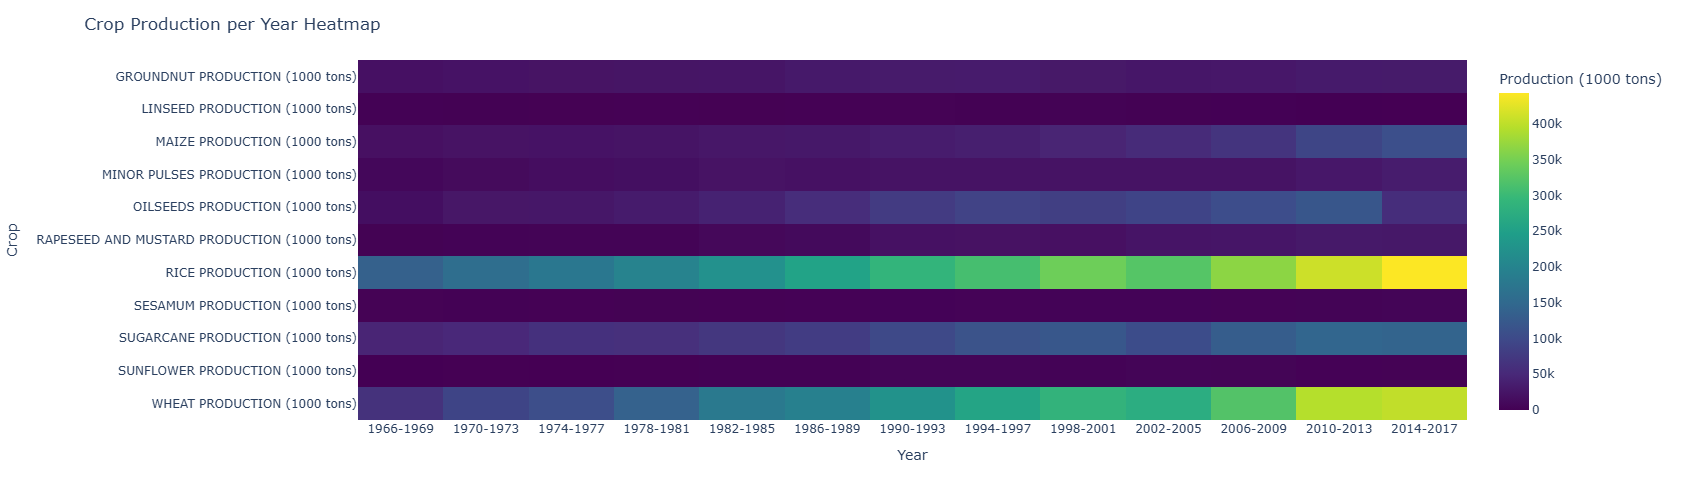

In [52]:
grouped_data = production_data.groupby('year_to_decade', observed=True, as_index=False).sum()

heatmap_data = grouped_data.melt(id_vars='year_to_decade', 
                                 var_name='Crop', 
                                 value_name='Production (1000 tons)')

heatmap_matrix = heatmap_data.pivot(index='Crop', columns='year_to_decade', values='Production (1000 tons)')

fig = px.imshow(
    heatmap_matrix,
    labels=dict(x="Year", y="Crop", color="Production (1000 tons)"),
    color_continuous_scale='Viridis',
    aspect="auto"
)

fig.update_layout(
    title='Crop Production per Year Heatmap',
    height=500,
    xaxis_nticks=20
)

fig.show()

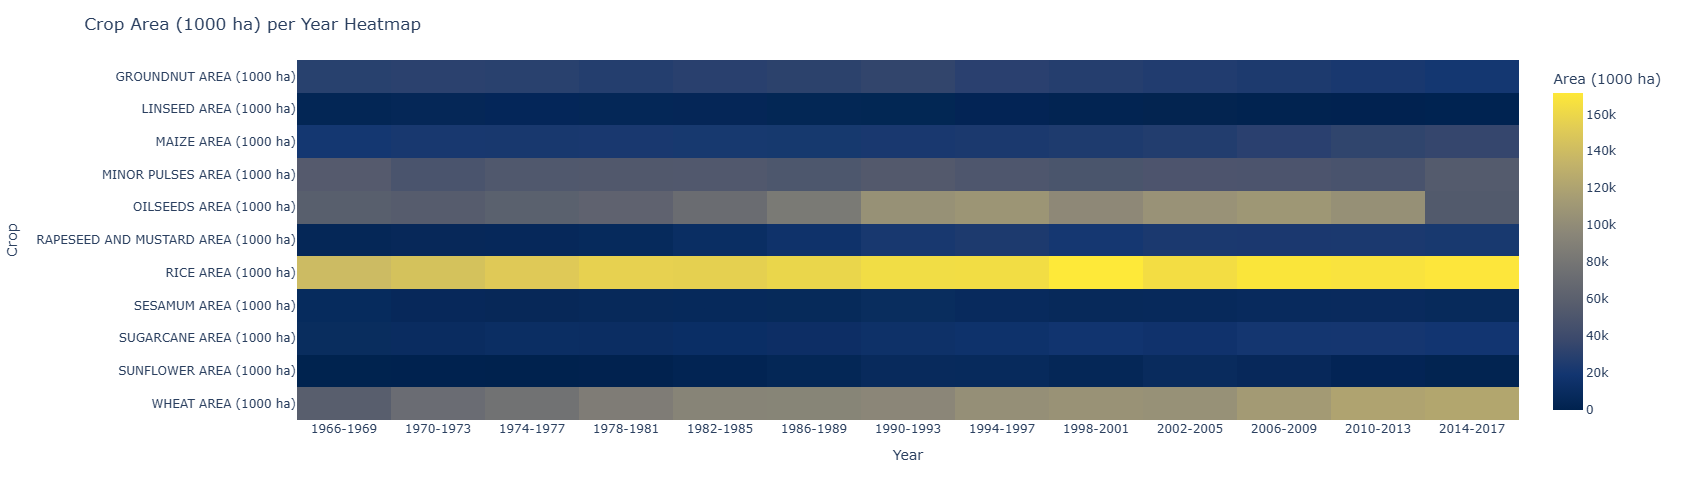

In [53]:

production_cols = [col for col in data.columns if 'AREA' in col]
production_data = data[['year_to_decade'] + production_cols]

grouped_data = production_data.groupby('year_to_decade',observed=True, as_index=False).sum()

heatmap_data = grouped_data.melt(id_vars='year_to_decade', 
                                 var_name='Crop', 
                                 value_name='Area (1000 ha)')

heatmap_matrix = heatmap_data.pivot(index='Crop', columns='year_to_decade', values='Area (1000 ha)')

fig = px.imshow(
    heatmap_matrix,
    labels=dict(x="Year", y="Crop", color="Area (1000 ha)"),
    color_continuous_scale='Cividis',
    aspect="auto"
)

fig.update_layout(
    title='Crop Area (1000 ha) per Year Heatmap',
    height=500,
    xaxis_nticks=20
)

fig.show()

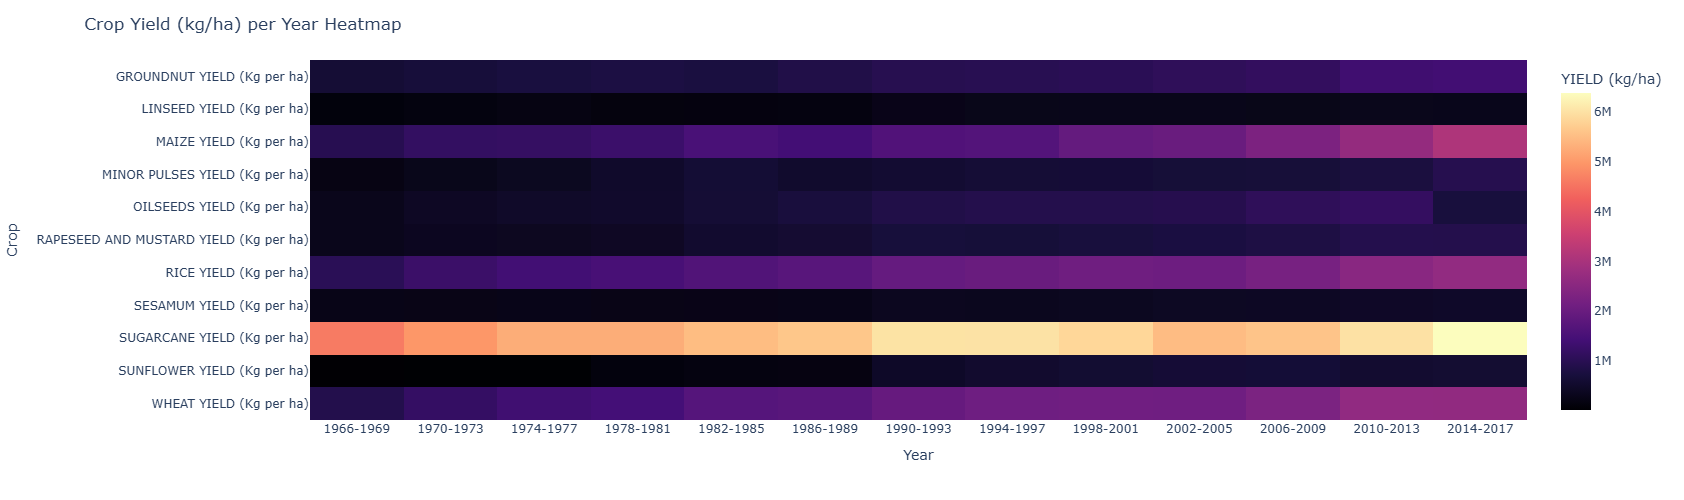

In [54]:

production_cols = [col for col in data.columns if 'YIELD' in col]
production_data = data[['year_to_decade'] + production_cols]

grouped_data = production_data.groupby('year_to_decade',observed=True, as_index=False).sum()

heatmap_data = grouped_data.melt(id_vars='year_to_decade', 
                                 var_name='Crop', 
                                 value_name='YIELD (kg/ha)')

heatmap_matrix = heatmap_data.pivot(index='Crop', columns='year_to_decade', values='YIELD (kg/ha)')

fig = px.imshow(
    heatmap_matrix,
    labels=dict(x="Year", y="Crop", color="YIELD (kg/ha)"),
    color_continuous_scale='Magma',
    aspect="auto"
)

fig.update_layout(
    title='Crop Yield (kg/ha) per Year Heatmap',
    height=500,
    xaxis_nticks=20
)

fig.show()

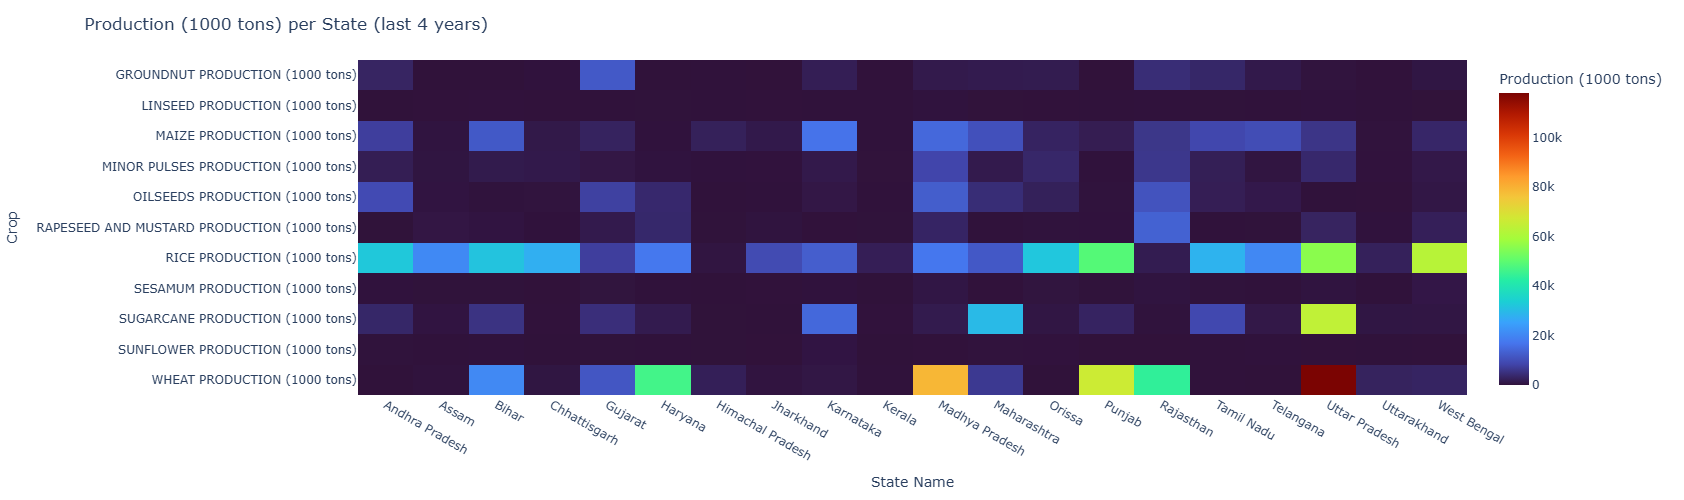

In [55]:
last_4_year = data[data['year_to_decade'] == '2014-2017']  ######### for last 5 year


production_cols = [col for col in last_4_year.columns if 'PRODUCTION' in col]
production_data = last_4_year[['State Name'] + production_cols]

grouped_data = production_data.groupby('State Name',observed=True, as_index=False).sum()

heatmap_data = grouped_data.melt(id_vars='State Name', 
                                 var_name='Crop', 
                                 value_name='Production (1000 tons)')

heatmap_matrix = heatmap_data.pivot(index='Crop', columns='State Name', values='Production (1000 tons)')

fig = px.imshow(
    heatmap_matrix,
    labels=dict(x="State Name", y="Crop", color="Production (1000 tons)"),
    color_continuous_scale='Turbo',
    aspect="auto"
)

fig.update_layout(
    title='Production (1000 tons) per State (last 4 years)',
    height=500,
    xaxis_nticks=20
)

fig.show()

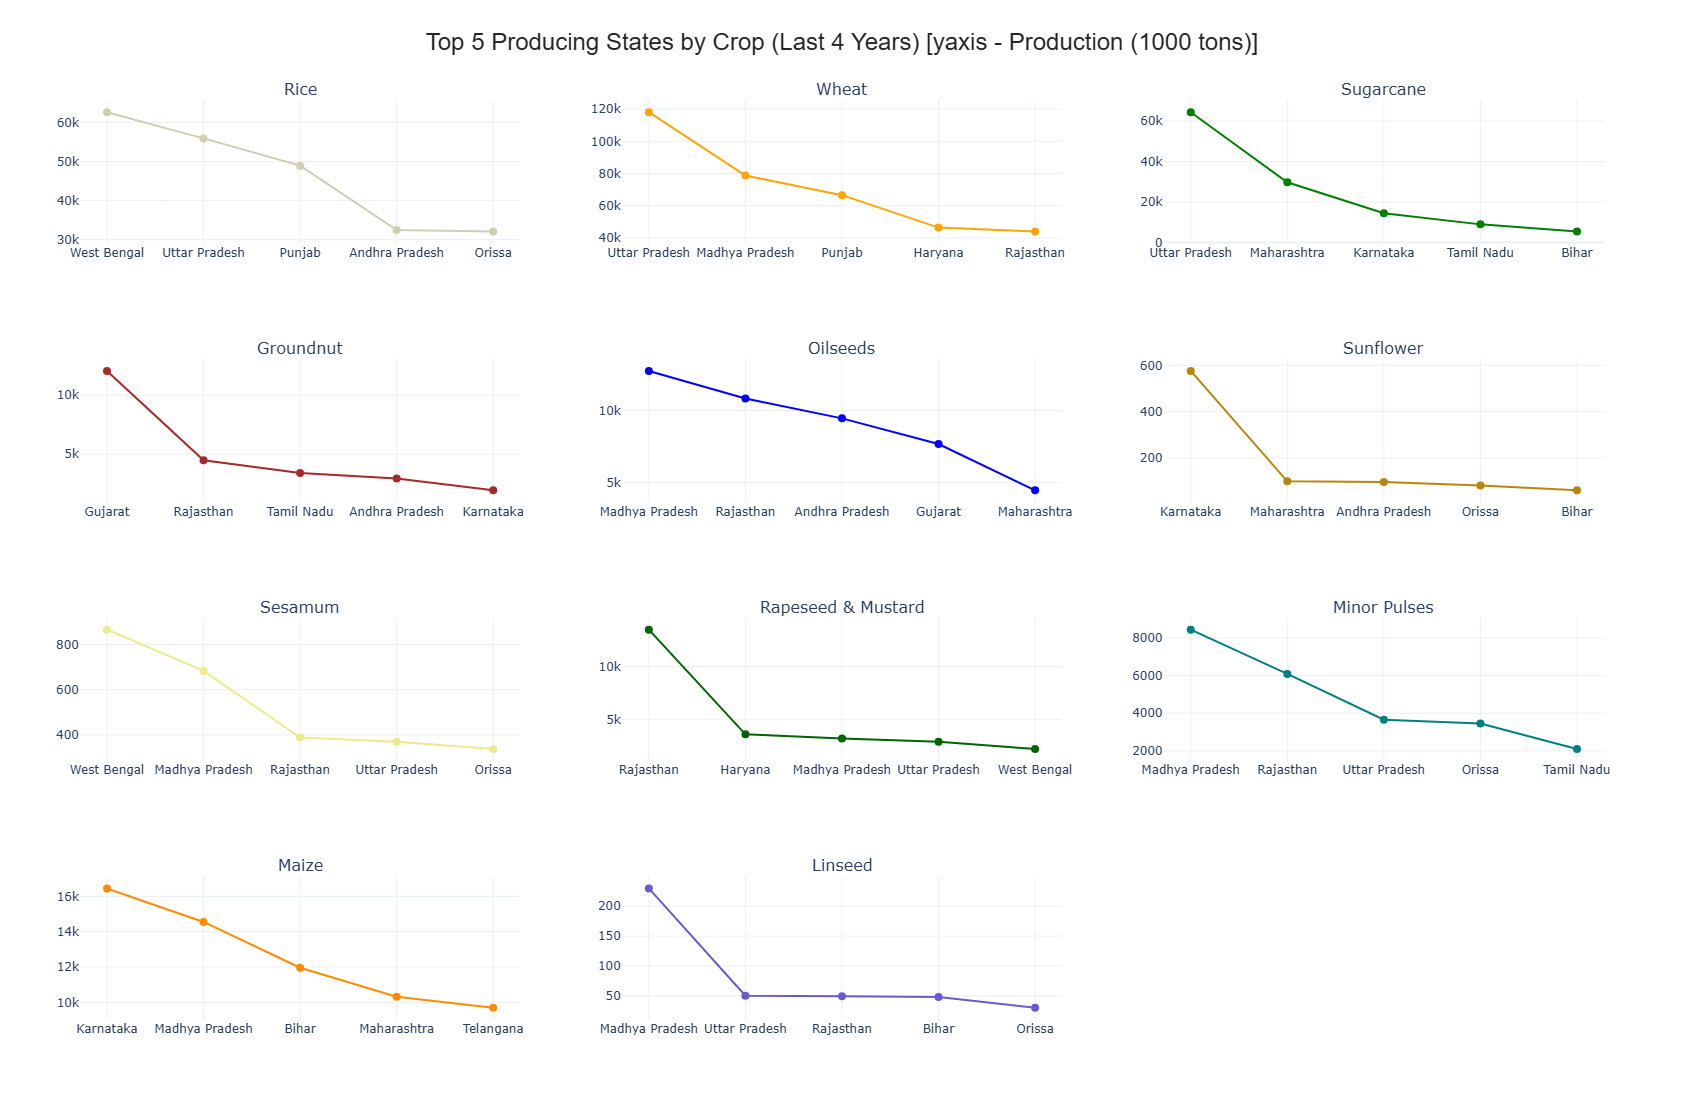

In [56]:
from plotly.subplots import make_subplots

crops = [
    ("Rice", 'RICE PRODUCTION (1000 tons)', "#cfceb3"),
    ("Wheat", 'WHEAT PRODUCTION (1000 tons)', 'orange'),
    ("Sugarcane", 'SUGARCANE PRODUCTION (1000 tons)', 'green'),
    ("Groundnut", 'GROUNDNUT PRODUCTION (1000 tons)', 'brown'),
    ("Oilseeds", 'OILSEEDS PRODUCTION (1000 tons)', 'blue'),
    ("Sunflower", 'SUNFLOWER PRODUCTION (1000 tons)', 'darkgoldenrod'),
    ("Sesamum", 'SESAMUM PRODUCTION (1000 tons)', "#eceb8b"),
    ("Rapeseed & Mustard", 'RAPESEED AND MUSTARD PRODUCTION (1000 tons)', 'darkgreen'),
    ("Minor Pulses", 'MINOR PULSES PRODUCTION (1000 tons)', 'teal'),
    ("Maize", 'MAIZE PRODUCTION (1000 tons)', 'darkorange'),
    ("Linseed", 'LINSEED PRODUCTION (1000 tons)', 'slateblue')
]

fig = make_subplots(rows=4, cols=3, subplot_titles=[crop[0] for crop in crops])


for i, (crop_name, column_name, color) in enumerate(crops):
    row = i // 3 + 1
    col = i % 3 + 1
    
    # Group and sort
    try:
        grouped = last_4_year.groupby('State Name', as_index=False)[column_name].sum()
        sorted_grouped = grouped.sort_values(by=column_name, ascending=False).head(5)

        fig.add_trace(go.Scatter(
            x=sorted_grouped['State Name'],
            y=sorted_grouped[column_name],
            mode='markers+lines',
            name=crop_name,
            line=dict(color=color),
            marker=dict(size=8)
        ), row=row, col=col)
        
    except KeyError:
        print(f"⚠️ Column '{column_name}' not found in the dataset. Skipping.")


fig.update_layout(
    title=dict(
        text='Top 5 Producing States by Crop (Last 4 Years) [yaxis - Production (1000 tons)]',
        font=dict(
            family='Arial',
            size=24,
            color="#232627"
        ),
        x=0.5  # Center the title (optional)
    ),
    showlegend=False,
    height=1100,
    width=1400,
    template='plotly_white'
)

fig.show()

## 📊 Crop Production Statistics Summary
* Rice and wheat are the most widely produced crops across India in terms of total volume.            
* However, when analyzed based on yield (production per hectare), sugarcane stands out with the highest yield, despite requiring less cultivated area than rice and wheat.                    
              
* Uttar Pradesh leads in the overall production of rice, wheat, and sugarcane, making it a key agricultural hub.             
* Interestingly, West Bengal surpasses it as the highest wheat-yielding state.                         
             
* Gujarat is a top performer in groundnut production, contributing significantly to India's total oilseed output.                          
             
* The largest maize-producing state is Karnataka, reflecting strong regional specialization in coarse cereals.               
                 
* Rajasthan dominates the production of rapeseed and mustard, making it the leading state for these key oilseeds.      

### 🔍 Focused Analysis   
* Gujarat – notable for groundnut and oilseed productivity

* Uttar Pradesh – dominant in rice, wheat, and sugarcane

* Rajasthan – leader in mustard and other oilseeds

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">CROP ANALYSIS OF GUJARAT</div>

In [57]:
gujarat = data[data['State Name'] == 'Gujarat' ]
# print(gujarat.describe())

In [58]:
gujarat['Dist Name'].unique()

array(['Ahmedabad', 'Amreli', 'Banaskantha', 'Bharuch',
       'Vadodara / Baroda', 'Bhavnagar', 'Valsad', 'Dangs', 'Jamnagar',
       'Junagadh', 'Kheda', 'Kutch', 'Mehsana', 'Panchmahal', 'Rajkot',
       'Sabarkantha', 'Surat', 'Surendranagar'], dtype=object)

In [59]:
last_4_year_gujarat = gujarat[gujarat['year_to_decade'] == '2014-2017']

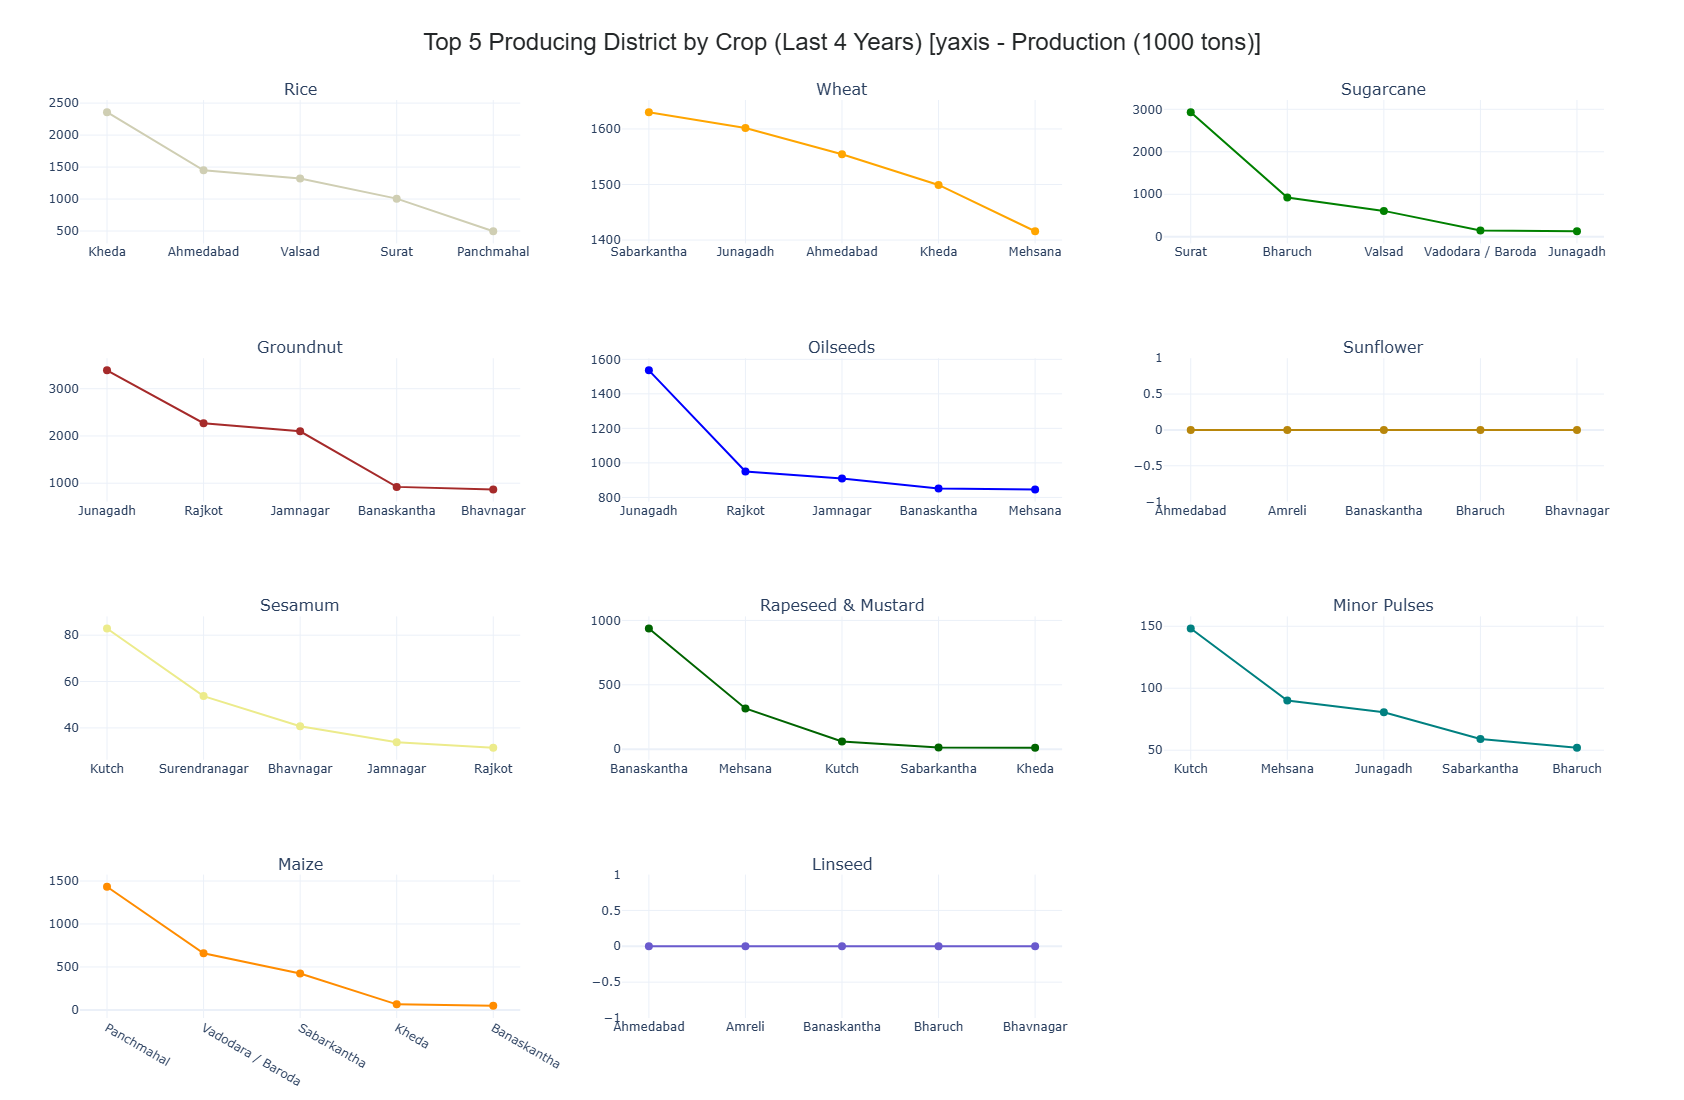

In [60]:
from plotly.subplots import make_subplots

crops = [
    ("Rice", 'RICE PRODUCTION (1000 tons)', "#cfceb3"),
    ("Wheat", 'WHEAT PRODUCTION (1000 tons)', 'orange'),
    ("Sugarcane", 'SUGARCANE PRODUCTION (1000 tons)', 'green'),
    ("Groundnut", 'GROUNDNUT PRODUCTION (1000 tons)', 'brown'),
    ("Oilseeds", 'OILSEEDS PRODUCTION (1000 tons)', 'blue'),
    ("Sunflower", 'SUNFLOWER PRODUCTION (1000 tons)', 'darkgoldenrod'),
    ("Sesamum", 'SESAMUM PRODUCTION (1000 tons)', "#eceb8b"),
    ("Rapeseed & Mustard", 'RAPESEED AND MUSTARD PRODUCTION (1000 tons)', 'darkgreen'),
    ("Minor Pulses", 'MINOR PULSES PRODUCTION (1000 tons)', 'teal'),
    ("Maize", 'MAIZE PRODUCTION (1000 tons)', 'darkorange'),
    ("Linseed", 'LINSEED PRODUCTION (1000 tons)', 'slateblue')
]

fig = make_subplots(rows=4, cols=3, subplot_titles=[crop[0] for crop in crops])


for i, (crop_name, column_name, color) in enumerate(crops):
    row = i // 3 + 1
    col = i % 3 + 1
    
    # Group and sort
    try:
        grouped = last_4_year_gujarat.groupby('Dist Name', as_index=False)[column_name].sum()
        sorted_grouped = grouped.sort_values(by=column_name, ascending=False).head(5)

        fig.add_trace(go.Scatter(
            x=sorted_grouped['Dist Name'],
            y=sorted_grouped[column_name],
            mode='markers+lines',
            name=crop_name,
            line=dict(color=color),
            marker=dict(size=8)
        ), row=row, col=col)
        
    except KeyError:
        print(f"⚠️ Column '{column_name}' not found in the dataset. Skipping.")


fig.update_layout(
    title=dict(
        text='Top 5 Producing District by Crop (Last 4 Years) [yaxis - Production (1000 tons)]',
        font=dict(
            family='Arial',
            size=24,
            color="#232627"
        ),
        x=0.5  
    ),
    showlegend=False,
    height=1100,
    width=1400,
    template='plotly_white'
)

fig.show()

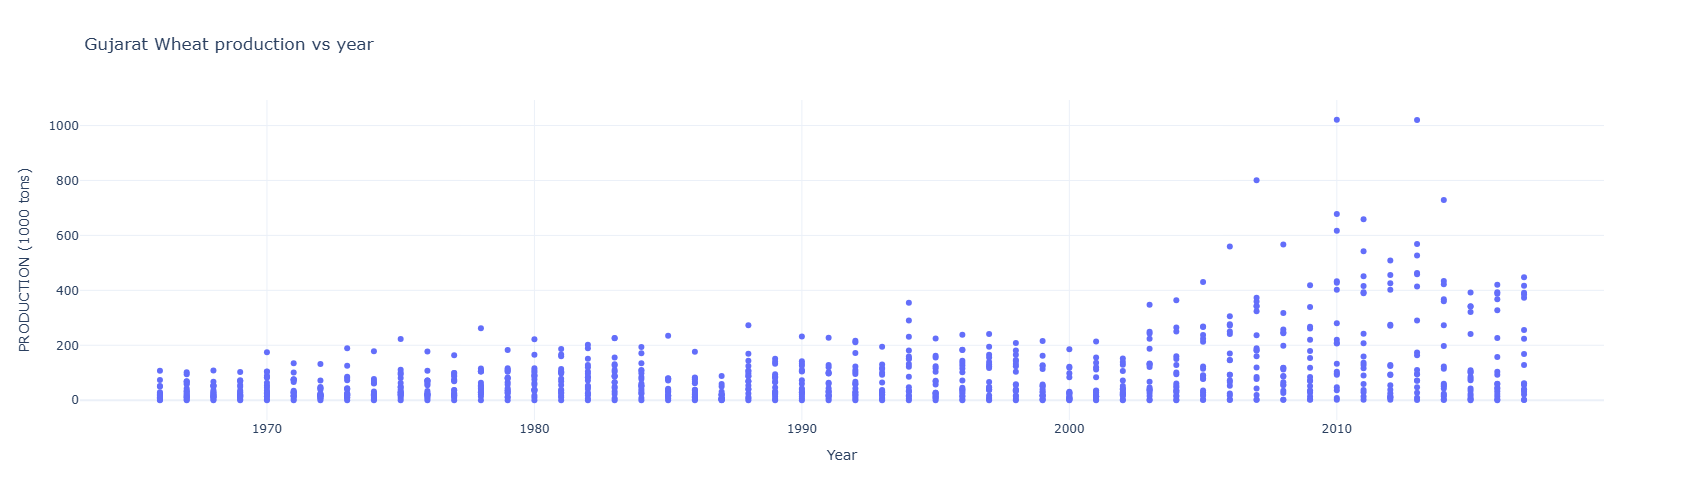

In [61]:
wheat = gujarat['WHEAT PRODUCTION (1000 tons)'].dropna()
x= gujarat['Year'].values


fig = px.scatter(x=x, y=wheat, labels={'x': 'Year', 'y': 'PRODUCTION (1000 tons)'}, title='Gujarat Wheat production vs year ')
fig.update_layout(template='plotly_white',
                  height = 500,
                  width = 800
                 )

fig.show()

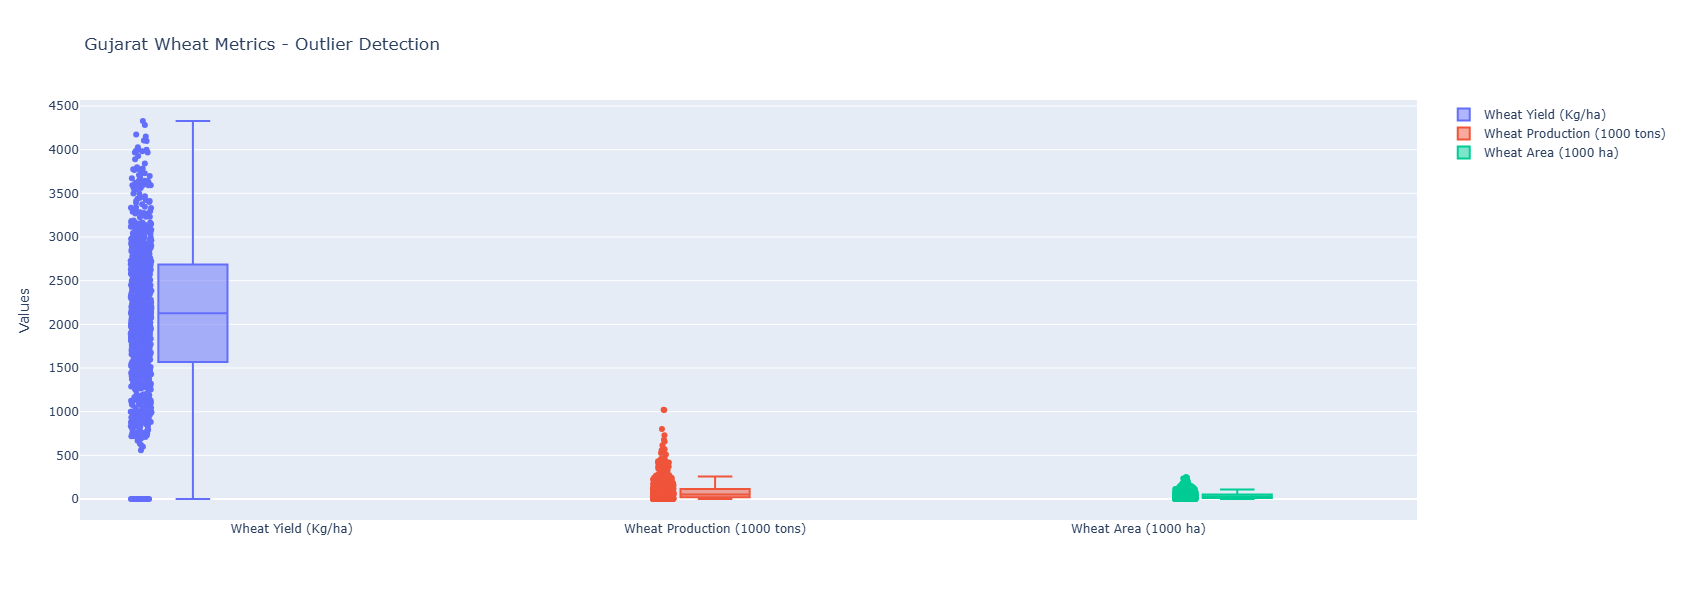

In [62]:
fig = go.Figure()

fig.add_trace(go.Box(y=gujarat['WHEAT YIELD (Kg per ha)'], name='Wheat Yield (Kg/ha)',boxpoints='all',))
fig.add_trace(go.Box(y=gujarat['WHEAT PRODUCTION (1000 tons)'], name='Wheat Production (1000 tons)',boxpoints='all'))
fig.add_trace(go.Box(y=gujarat['WHEAT AREA (1000 ha)'], name='Wheat Area (1000 ha)',boxpoints='all'))


fig.update_layout(title='Gujarat Wheat Metrics - Outlier Detection',
                  yaxis_title='Values',
                  boxmode='group',
                 
                  height = 600)

fig.show()

In [5]:
fig = go.Figure(data=[go.Histogram(
    x=data['WHEAT YIELD (Kg per ha)'],  
    histnorm='probability',      
    nbinsx=50                   
)])

fig.update_layout(
    title='Distribution of wheat yield',
    xaxis_title='wheat yield kg/ha',
     yaxis_title='Count',
    template='plotly_white'
)

fig.show()

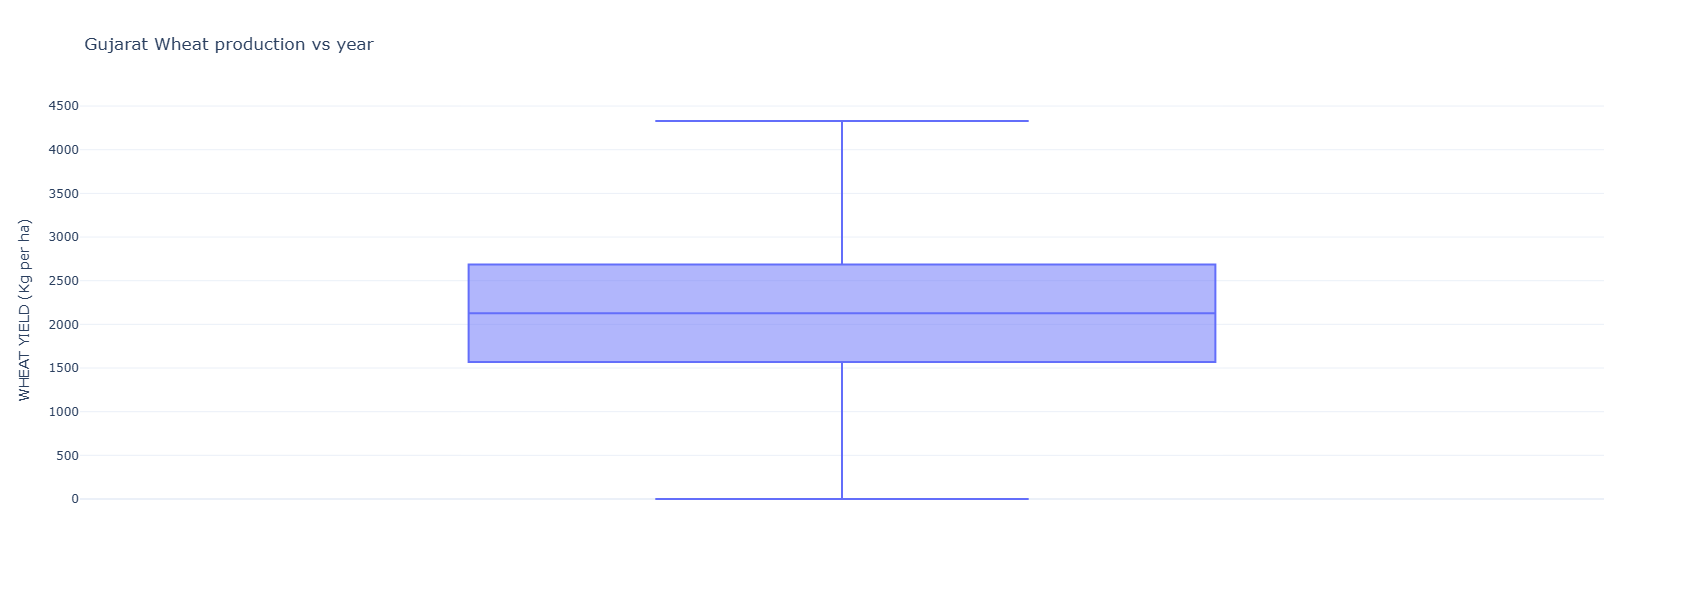

In [63]:
fig = px.box(gujarat, y = 'WHEAT YIELD (Kg per ha)', title='Gujarat Wheat production vs year ')
fig.update_layout(template='plotly_white',
                  height = 600,
                  width = 1000
                 )
fig.show()

In [68]:
production_cols = [col for col in gujarat.columns if 'PRODUCTION' in col]
production_data = gujarat[['year_to_decade'] + production_cols]

In [69]:
bins = list(range(1966, 2021, 5))  

labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

gujarat['year_to_decade'] = pd.cut(gujarat['Year'], bins=bins, labels=labels, right=False)

C:\Users\Kartik\AppData\Local\Temp\ipykernel_4560\3298645166.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



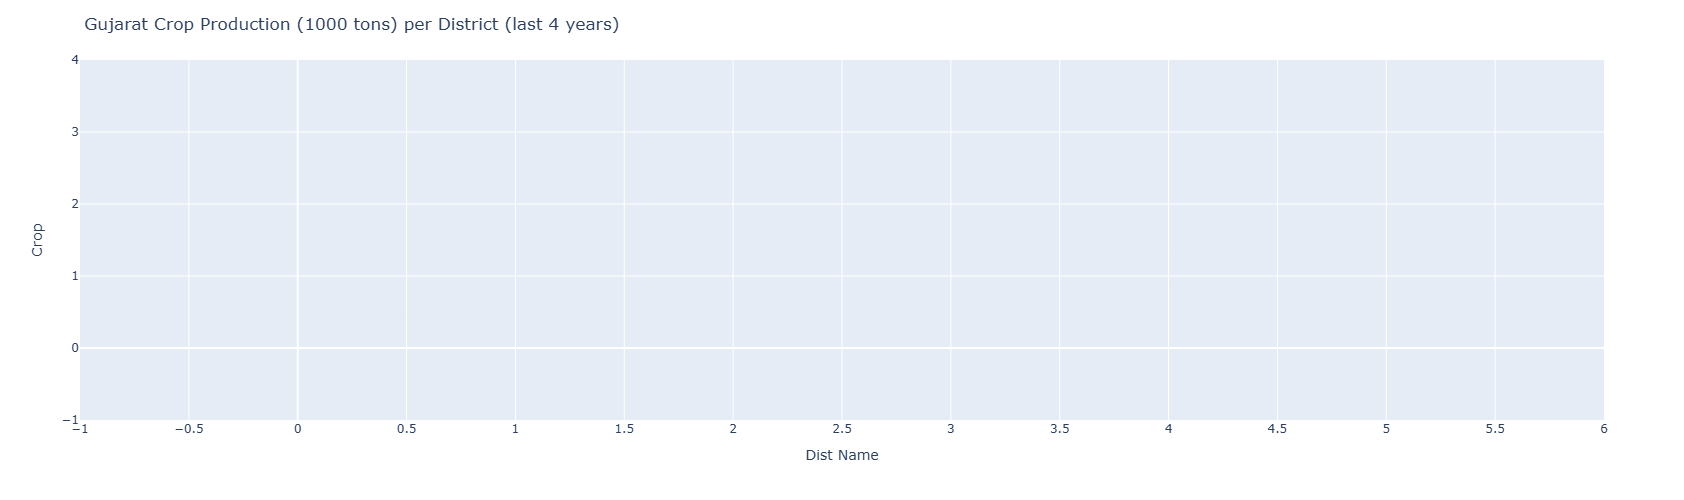

In [75]:
last_5_year = gujarat[gujarat['year_to_decade'] == '2014-2017']  ######### for last 5 year


production_cols = [col for col in last_5_year.columns if 'PRODUCTION' in col]
production_data = last_5_year[['Dist Name'] + production_cols]

grouped_data = production_data.groupby('Dist Name',observed=True, as_index=False).sum()

heatmap_data = grouped_data.melt(id_vars='Dist Name', 
                                 var_name='Crop', 
                                 value_name='Production (1000 tons)')

heatmap_matrix = heatmap_data.pivot(index='Crop', columns='Dist Name', values='Production (1000 tons)')

fig = px.imshow(
    heatmap_matrix,
    labels=dict(x="Dist Name", y="Crop", color="Production (1000 tons)"),
    color_continuous_scale='Turbo',
    aspect="auto"
)

fig.update_layout(
    title=' Gujarat Crop Production (1000 tons) per District (last 4 years)',
    height=500,
    xaxis_nticks=20
)

fig.show()

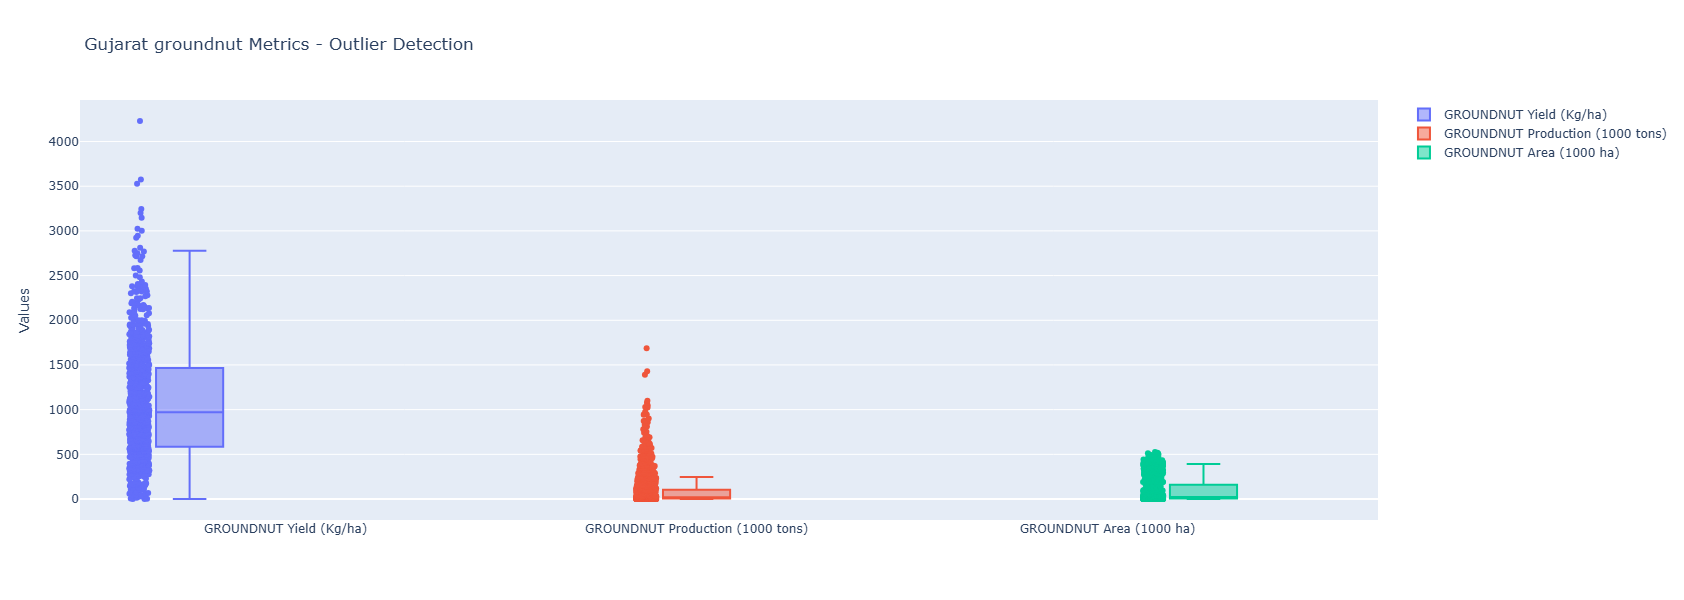

In [71]:
fig = go.Figure()

fig.add_trace(go.Box(y=gujarat['GROUNDNUT YIELD (Kg per ha)'], name='GROUNDNUT Yield (Kg/ha)',boxpoints='all',))
fig.add_trace(go.Box(y=gujarat['GROUNDNUT PRODUCTION (1000 tons)'], name='GROUNDNUT Production (1000 tons)',boxpoints='all'))
fig.add_trace(go.Box(y=gujarat['GROUNDNUT AREA (1000 ha)'], name='GROUNDNUT Area (1000 ha)',boxpoints='all'))


fig.update_layout(title='Gujarat groundnut Metrics - Outlier Detection',
                  yaxis_title='Values',
                  boxmode='group',
                 
                  height = 600)

fig.show()

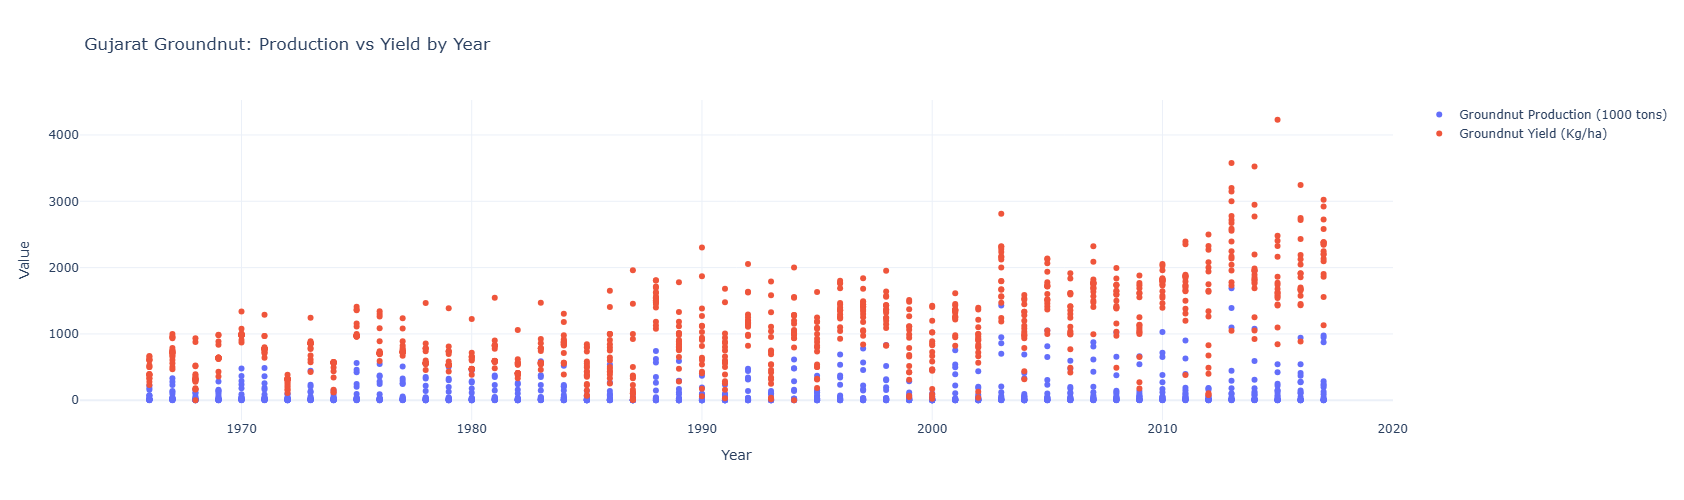

In [76]:
import plotly.graph_objects as go

# Drop NA for both to ensure alignment
groundnut_prod = gujarat['GROUNDNUT PRODUCTION (1000 tons)'].dropna()
groundnut_yield = gujarat['GROUNDNUT YIELD (Kg per ha)'].dropna()
years = gujarat['Year']

fig = go.Figure()

# Groundnut Production
fig.add_trace(go.Scatter(
    x=years,
    y=groundnut_prod,
    mode='markers',
    name='Groundnut Production (1000 tons)',
   
))

# Groundnut Yield
fig.add_trace(go.Scatter(
    x=years,
    y=groundnut_yield,
    mode='markers',
    name='Groundnut Yield (Kg/ha)'
    ))
   

fig.update_layout(
    title='Gujarat Groundnut: Production vs Yield by Year',
    xaxis_title='Year',
    yaxis_title='Value',
    template='plotly_white',
    height=500,
    width=800
)

fig.show()


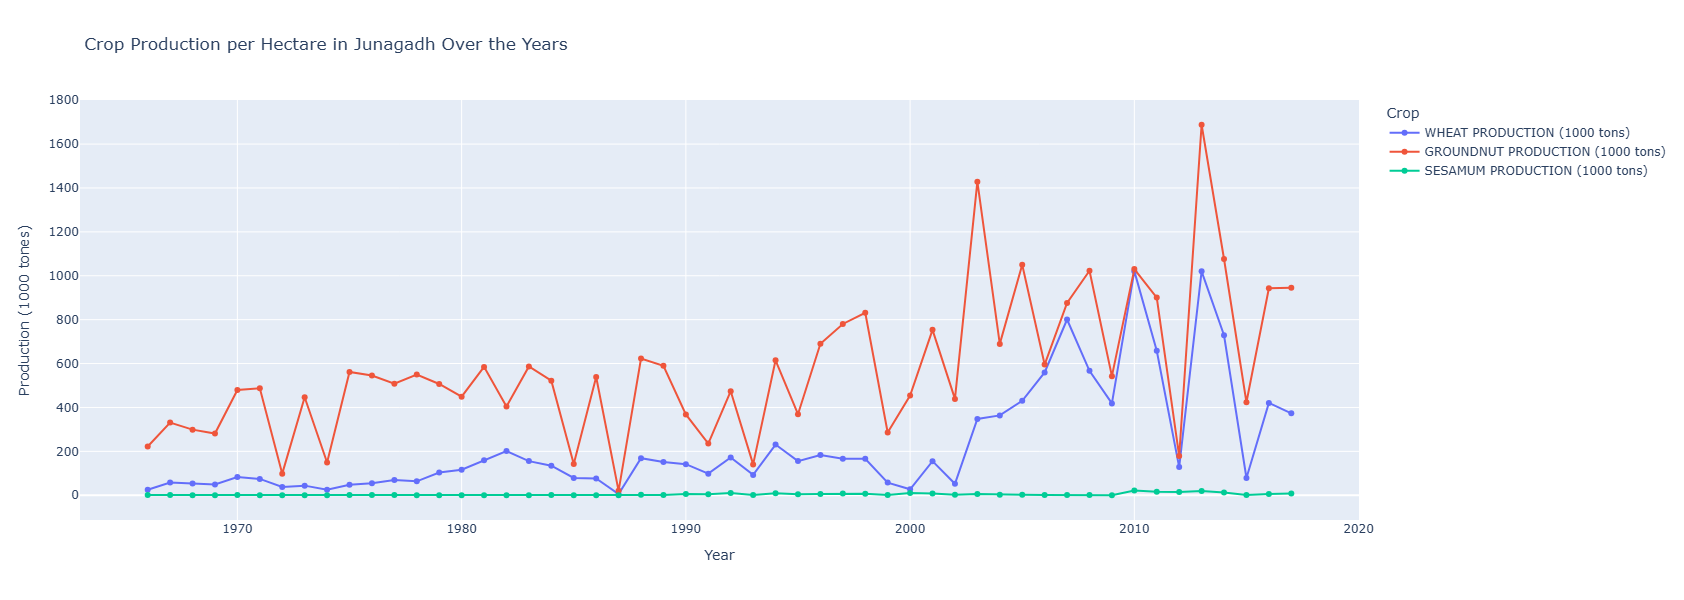

In [77]:
junagadh_data = gujarat[gujarat['Dist Name'] == 'Junagadh']


crop_cols = [
    'WHEAT PRODUCTION (1000 tons)', 
    'GROUNDNUT PRODUCTION (1000 tons)', 
    'SESAMUM PRODUCTION (1000 tons)',
    

]


line_data = junagadh_data[['Year'] + crop_cols].melt(
    id_vars='Year',
    var_name='Crop',
    value_name='Production (1000 tones)'
)

fig = px.line(
    line_data,
    x='Year',
    y='Production (1000 tones)',
    color='Crop',
    markers=True,
    title='Crop Production per Hectare in Junagadh Over the Years'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Production (1000 tones)',
    height=600
)

fig.show()


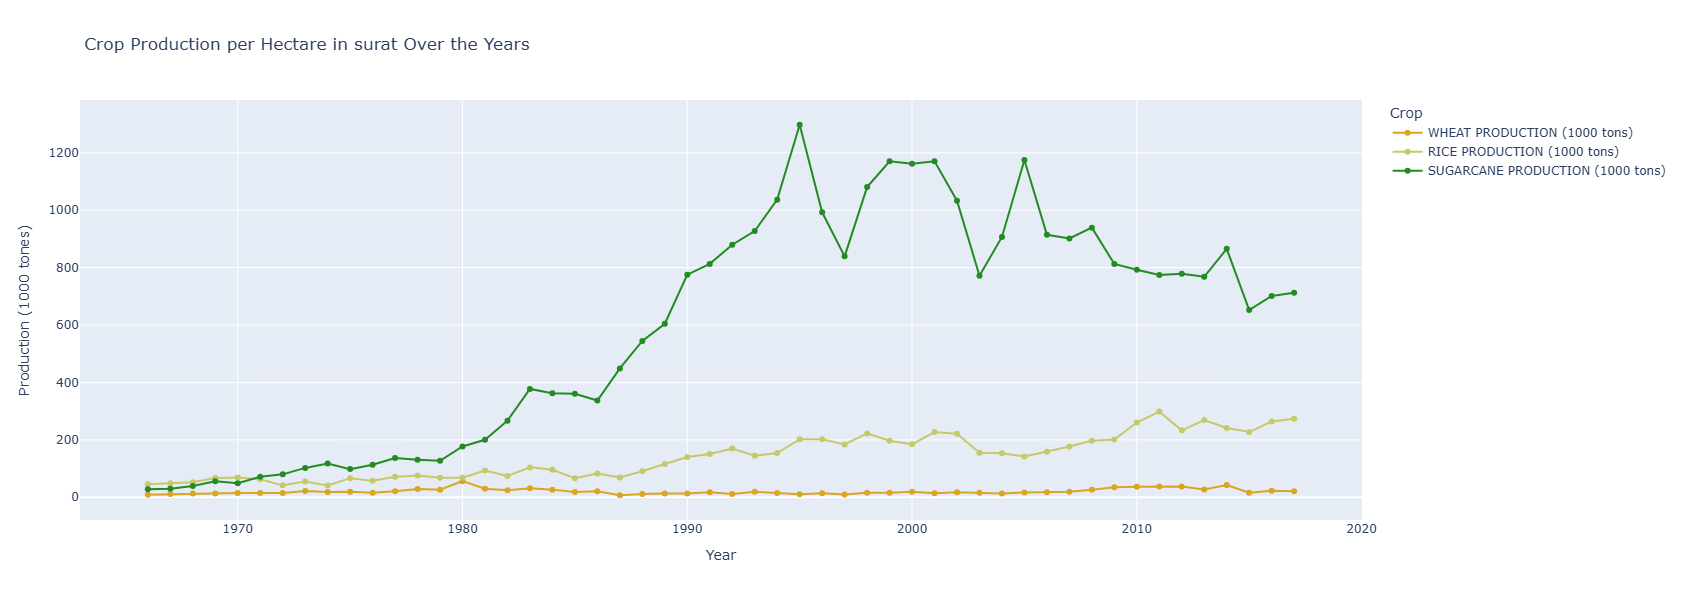

In [78]:
surat_data = gujarat[gujarat['Dist Name'] == 'Surat']


crop_cols = [
    'WHEAT PRODUCTION (1000 tons)', 
    'RICE PRODUCTION (1000 tons)',
    'SUGARCANE PRODUCTION (1000 tons)'
]


line_data = surat_data[['Year'] + crop_cols].melt(
    id_vars='Year',
    var_name='Crop',
    value_name='Production (1000 tones)'
)

fig = px.line(
    line_data,
    x='Year',
    y='Production (1000 tones)',
    color='Crop',
    color_discrete_map={'WHEAT PRODUCTION (1000 tons)' : '#DAA520', 
    'RICE PRODUCTION (1000 tons)':"#C6C96A",
    'SUGARCANE PRODUCTION (1000 tons)': '#228B22'},
    markers=True,
    title='Crop Production per Hectare in surat Over the Years'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Production (1000 tones)',
    height=600
)

fig.show()

### 🌾 Key Crop Production Highlights – Gujarat (District-wise)
* **Rice:**              
* The highest rice production in Gujarat is observed in Kheda district, making it a key rice-producing region within the state.            
                  
* **Sugarcane:**     
* Surat stands out for sugarcane cultivation, with an exceptional production spike in 1995, reaching 1,298,000 tons — a historical outlier in the state’s sugarcane data.                              
                  
* **Groundnut:**                              
* The leading groundnut-producing district in not just Gujarat but all of India is Junagadh.                       
* A remarkable year was 2015, where groundnut production peaked at 1,688,000 tons — an extraordinary output by any standard.                                    
                 
* **Wheat:**          
* Gujarat saw its highest wheat production between 2010 and 2013, with yields nearly tripling (3x) compared to other years, indicating a significant growth period in wheat farming during that time.            

### 🧭 Summary of Gujarat’s Crop Focus
**The major crops dominating Gujarat's agriculture are:**

* 🌾 Wheat

* 🥜 Groundnut


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">CROP ANALYSIS OF UTTAR PRADESH</div>

In [79]:
data['State Name'].unique()

array(['Chhattisgarh', 'Madhya Pradesh', 'Andhra Pradesh', 'Telangana',
       'Karnataka', 'Tamil Nadu', 'Maharashtra', 'Gujarat', 'Rajasthan',
       'Punjab', 'Haryana', 'Uttar Pradesh', 'Uttarakhand', 'Assam',
       'Himachal Pradesh', 'Kerala', 'Orissa', 'West Bengal', 'Bihar',
       'Jharkhand'], dtype=object)

In [80]:
up = data[data['State Name'] == 'Uttar Pradesh' ]
# print(up.describe())

In [81]:
up_last_4_year = up[up['year_to_decade'] == '2014-2017']

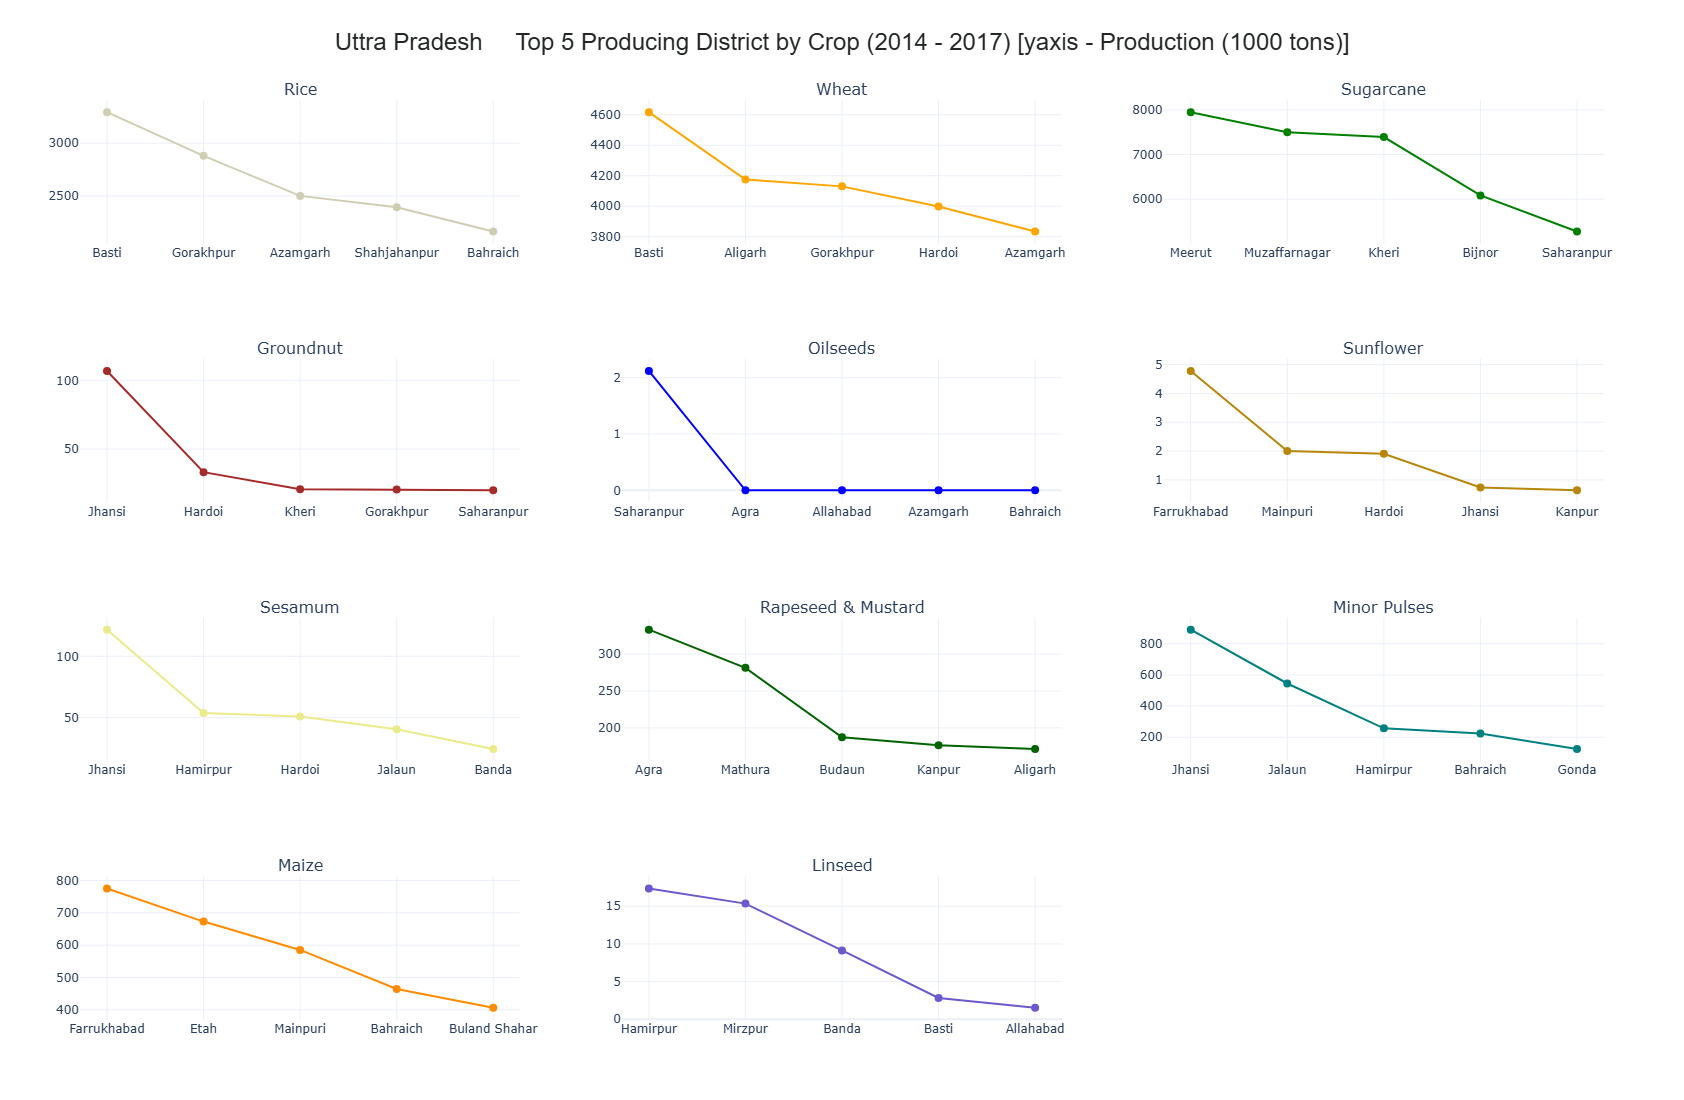

In [82]:
from plotly.subplots import make_subplots

crops = [
    ("Rice", 'RICE PRODUCTION (1000 tons)', "#cfceb3"),
    ("Wheat", 'WHEAT PRODUCTION (1000 tons)', 'orange'),
    ("Sugarcane", 'SUGARCANE PRODUCTION (1000 tons)', 'green'),
    ("Groundnut", 'GROUNDNUT PRODUCTION (1000 tons)', 'brown'),
    ("Oilseeds", 'OILSEEDS PRODUCTION (1000 tons)', 'blue'),
    ("Sunflower", 'SUNFLOWER PRODUCTION (1000 tons)', 'darkgoldenrod'),
    ("Sesamum", 'SESAMUM PRODUCTION (1000 tons)', "#eceb8b"),
    ("Rapeseed & Mustard", 'RAPESEED AND MUSTARD PRODUCTION (1000 tons)', 'darkgreen'),
    ("Minor Pulses", 'MINOR PULSES PRODUCTION (1000 tons)', 'teal'),
    ("Maize", 'MAIZE PRODUCTION (1000 tons)', 'darkorange'),
    ("Linseed", 'LINSEED PRODUCTION (1000 tons)', 'slateblue')
]

fig = make_subplots(rows=4, cols=3, subplot_titles=[crop[0] for crop in crops])


for i, (crop_name, column_name, color) in enumerate(crops):
    row = i // 3 + 1
    col = i % 3 + 1
    
    # Group and sort
    try:
        grouped = up_last_4_year.groupby('Dist Name', as_index=False)[column_name].sum()
        sorted_grouped = grouped.sort_values(by=column_name, ascending=False).head(5)

        fig.add_trace(go.Scatter(
            x=sorted_grouped['Dist Name'],
            y=sorted_grouped[column_name],
            mode='markers+lines',
            name=crop_name,
            line=dict(color=color),
            marker=dict(size=8)
        ), row=row, col=col)
        
    except KeyError:
        print(f"⚠️ Column '{column_name}' not found in the dataset. Skipping.")


fig.update_layout(
    title=dict(
        text='Uttra Pradesh     Top 5 Producing District by Crop (2014 - 2017) [yaxis - Production (1000 tons)]',
        font=dict(
            family='Arial',
            size=24,
            color="#232627"
        ),
        x=0.5  
    ),
    showlegend=False,
    height=1100,
    width=1400,
    template='plotly_white'
)

fig.show()

In [33]:
up['Dist Name'].unique()

array(['Saharanpur', 'Muzaffarnagar', 'Meerut', 'Buland Shahar',
       'Aligarh', 'Mathura', 'Agra', 'Mainpuri', 'Etah', 'Bareilly',
       'Budaun', 'Moradabad', 'Shahjahanpur', 'Pilibhit', 'Rampur',
       'Bijnor', 'Farrukhabad', 'Etawah', 'Kanpur', 'Fatehpur',
       'Allahabad', 'Jhansi', 'Jalaun', 'Hamirpur', 'Banda', 'Varanasi',
       'Mirzpur', 'Jaunpur', 'Ghazipur', 'Ballia', 'Gorakhpur', 'Deoria',
       'Basti', 'Azamgarh', 'Lucknow', 'Unnao', 'Rae-Bareily', 'Sitapur',
       'Hardoi', 'Kheri', 'Faizabad', 'Gonda', 'Bahraich', 'Sultanpur',
       'Pratapgarh', 'Barabanki'], dtype=object)

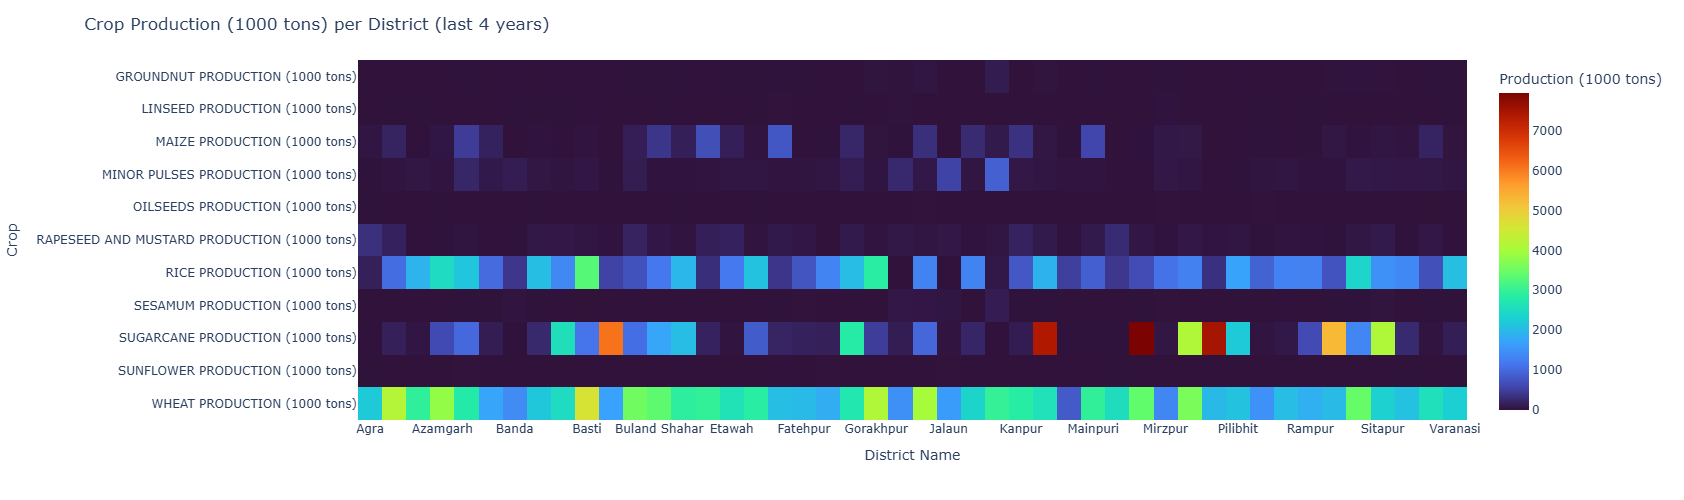

In [34]:
last_5_year = up[up['year_to_decade'] == '2014-2017']  ######### for last 5 year


production_cols = [col for col in last_5_year.columns if 'PRODUCTION' in col]
production_data = last_5_year[['Dist Name'] + production_cols]

grouped_data = production_data.groupby('Dist Name',observed=True, as_index=False).sum()

heatmap_data = grouped_data.melt(id_vars='Dist Name', 
                                 var_name='Crop', 
                                 value_name='Production (1000 tons)')

heatmap_matrix = heatmap_data.pivot(index='Crop', columns='Dist Name', values='Production (1000 tons)')

fig = px.imshow(
    heatmap_matrix,
    labels=dict(x="District Name", y="Crop", color="Production (1000 tons)"),
    color_continuous_scale='Turbo',
    aspect="auto"
)

fig.update_layout(
    title='Crop Production (1000 tons) per District (last 4 years)',
    height=500,
    xaxis_nticks=20
)

fig.show()

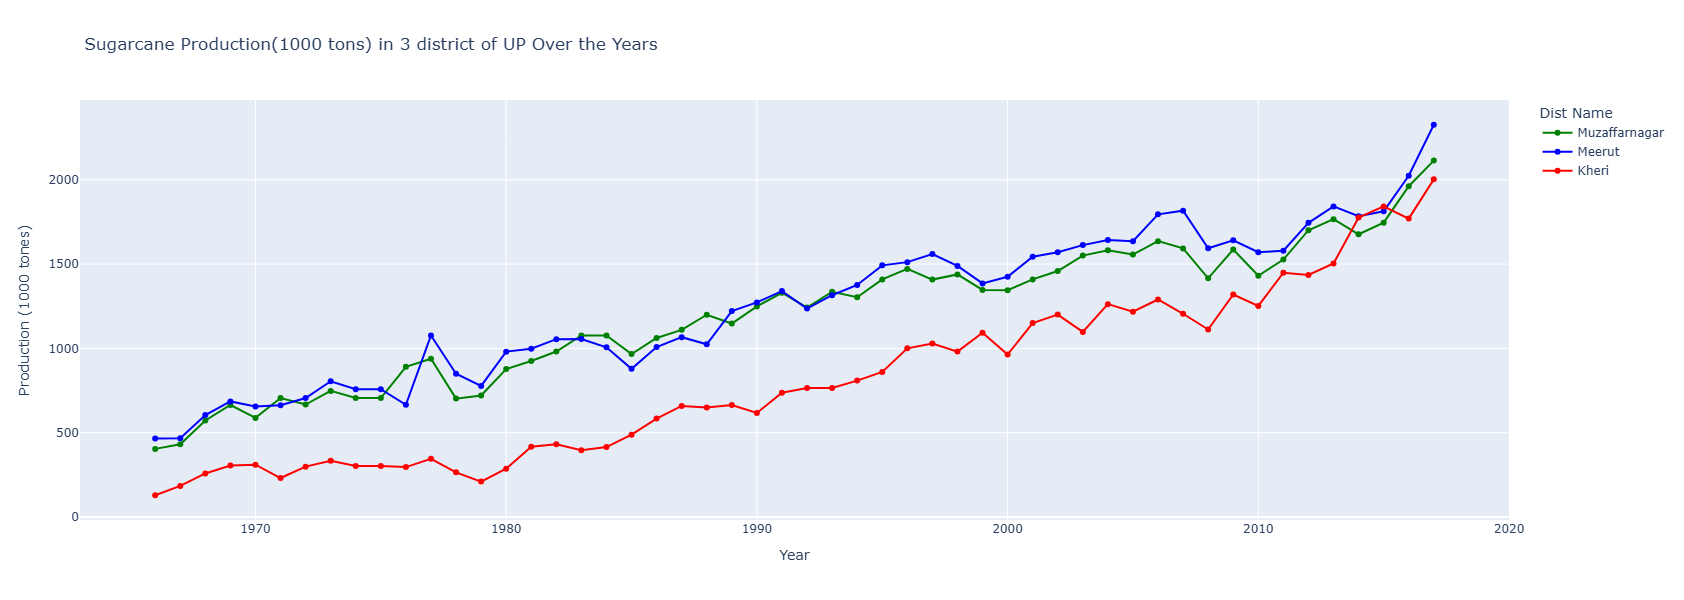

In [83]:
y = up['SUGARCANE PRODUCTION (1000 tons)']
x = up['Year']
dist_cols = [
    'Kheri', 
    'Meerut',
    'Muzaffarnagar'
]
filtered_data = up[up['Dist Name'].isin(dist_cols)]

fig = px.line(
    filtered_data,
    x='Year',
    y='SUGARCANE PRODUCTION (1000 tons)',
    color='Dist Name',
    
    color_discrete_map={'Kheri': 'red', 
    'Meerut':'blue',
    'Muzaffarnagar':'green',},
    markers=True,
    title='Sugarcane Production(1000 tons) in 3 district of UP Over the Years'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Production (1000 tones)',
    height=600
)

fig.show()

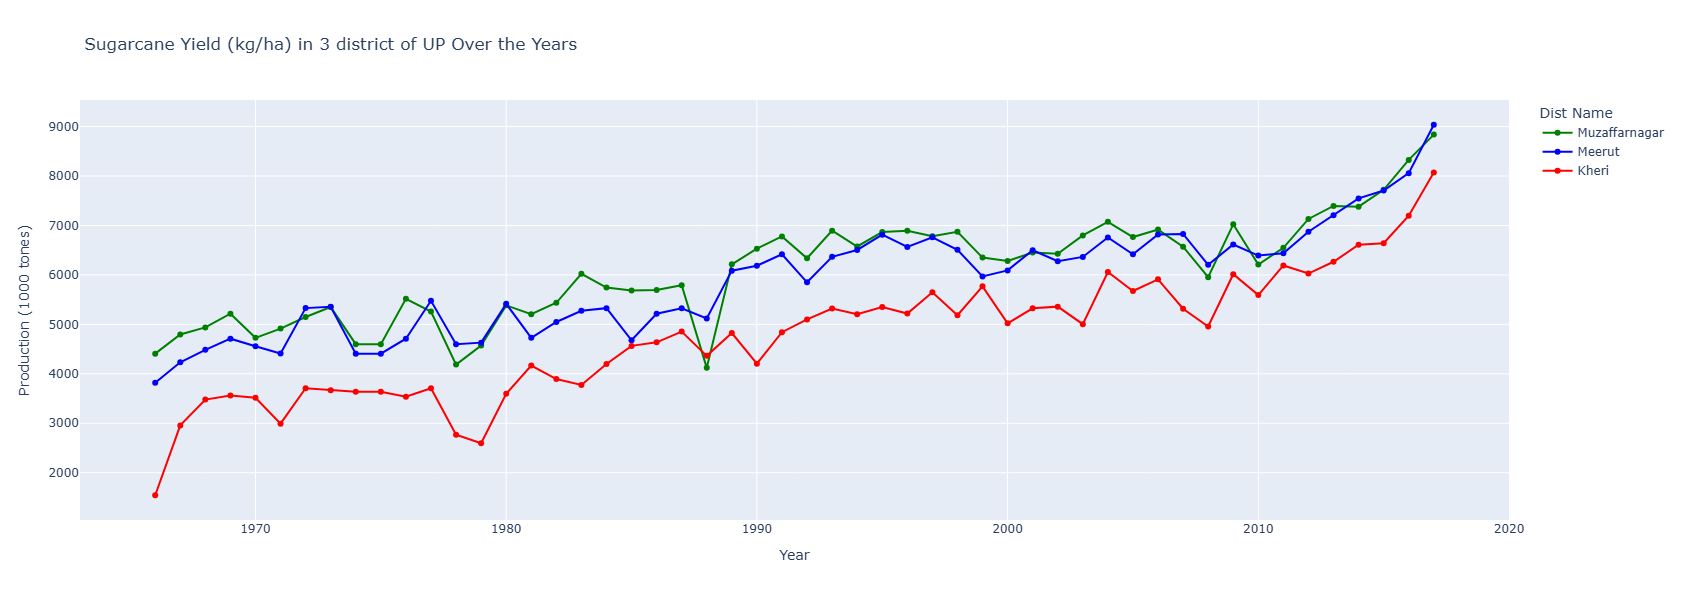

In [84]:
y = up['SUGARCANE YIELD (Kg per ha)']
x = up['Year']
dist_cols = [
    'Kheri', 
    'Meerut',
    'Muzaffarnagar'
]
filtered_data = up[up['Dist Name'].isin(dist_cols)]

fig = px.line(
    filtered_data,
    x='Year',
    y='SUGARCANE YIELD (Kg per ha)',
    color='Dist Name',
    
    color_discrete_map={'Kheri': 'red', 
    'Meerut':'blue',
    'Muzaffarnagar':'green',},
    markers=True,
    title='Sugarcane Yield (kg/ha) in 3 district of UP Over the Years'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Production (1000 tones)',
    height=600
)

fig.show()

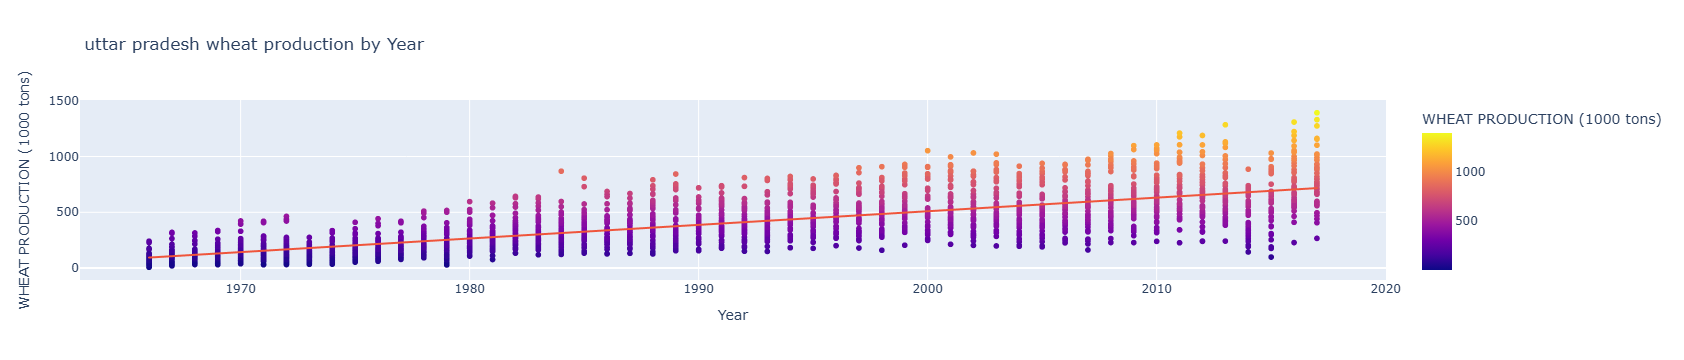

In [85]:
px.scatter(up, y='WHEAT PRODUCTION (1000 tons)', x='Year',color='WHEAT PRODUCTION (1000 tons)', trendline='ols', title='uttar pradesh wheat production by Year')

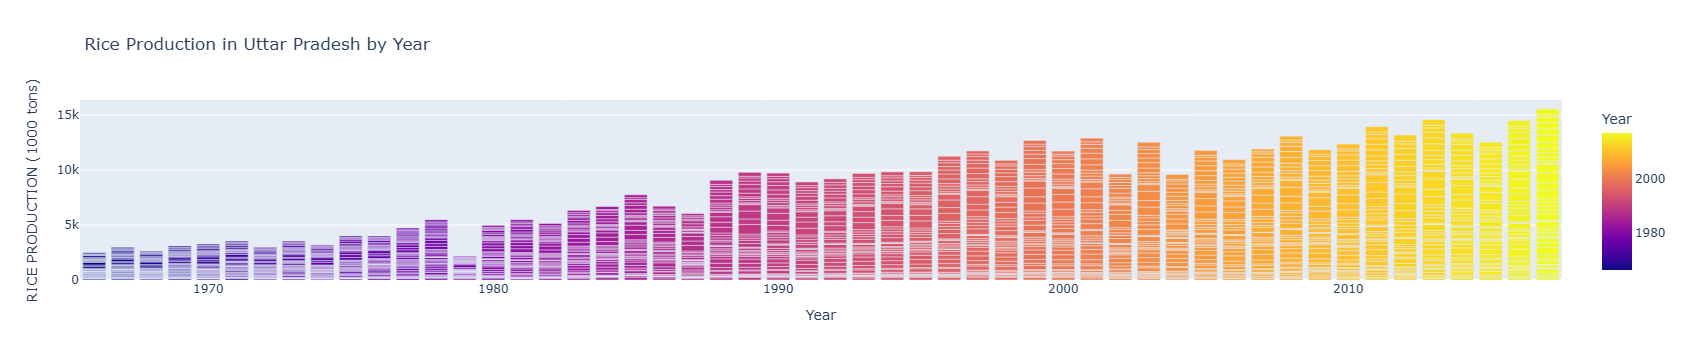

In [86]:
y = up['RICE PRODUCTION (1000 tons)']
fig = px.bar(
    up,
    x='Year',
    y = y,
    title='Rice Production in Uttar Pradesh by Year',
    color= 'Year',
    
    
)

fig.update_layout(
    showlegend = False
)

fig.show()


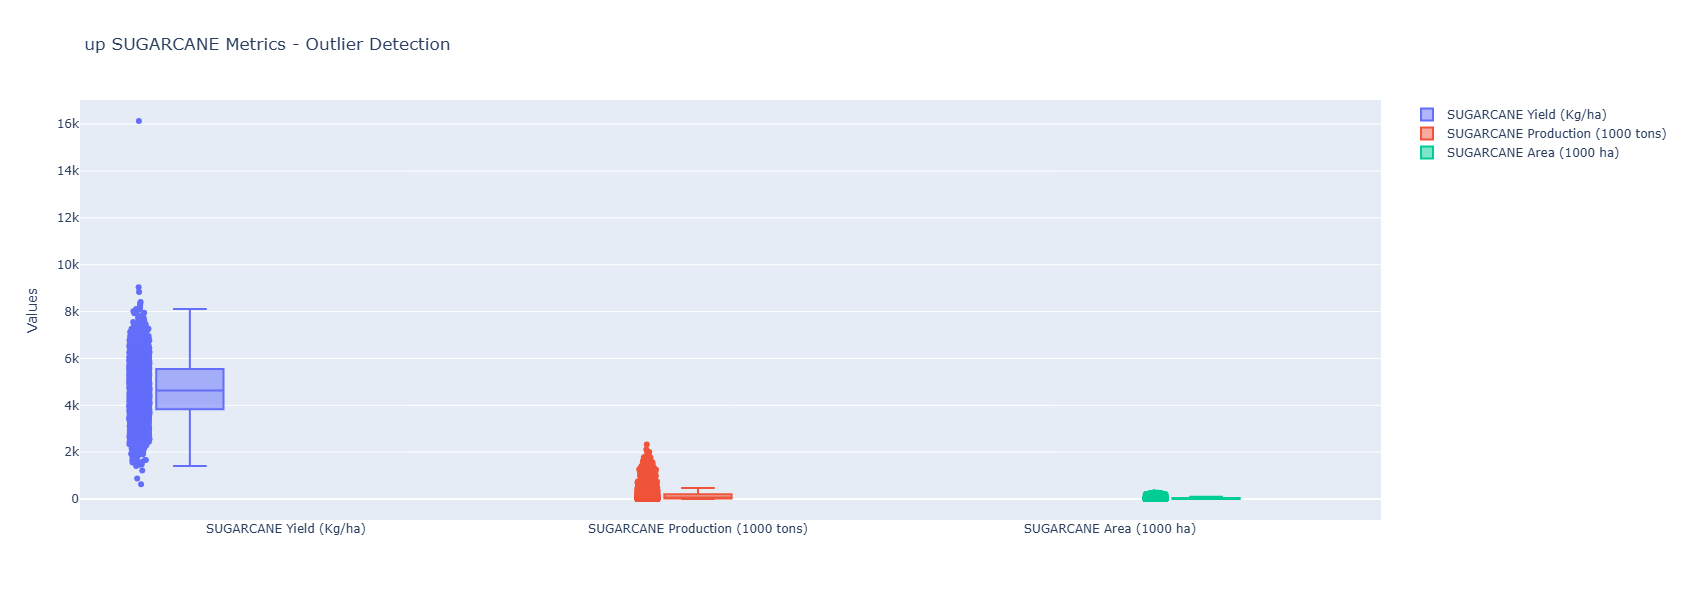

In [87]:
fig = go.Figure()

fig.add_trace(go.Box(y=up['SUGARCANE YIELD (Kg per ha)'], name='SUGARCANE Yield (Kg/ha)',boxpoints='all',))
fig.add_trace(go.Box(y=up['SUGARCANE PRODUCTION (1000 tons)'], name='SUGARCANE Production (1000 tons)',boxpoints='all'))
fig.add_trace(go.Box(y=up['SUGARCANE AREA (1000 ha)'], name='SUGARCANE Area (1000 ha)',boxpoints='all'))


fig.update_layout(title='up SUGARCANE Metrics - Outlier Detection',
                  yaxis_title='Values',
                  boxmode='group',
                 
                  height = 600)

fig.show()

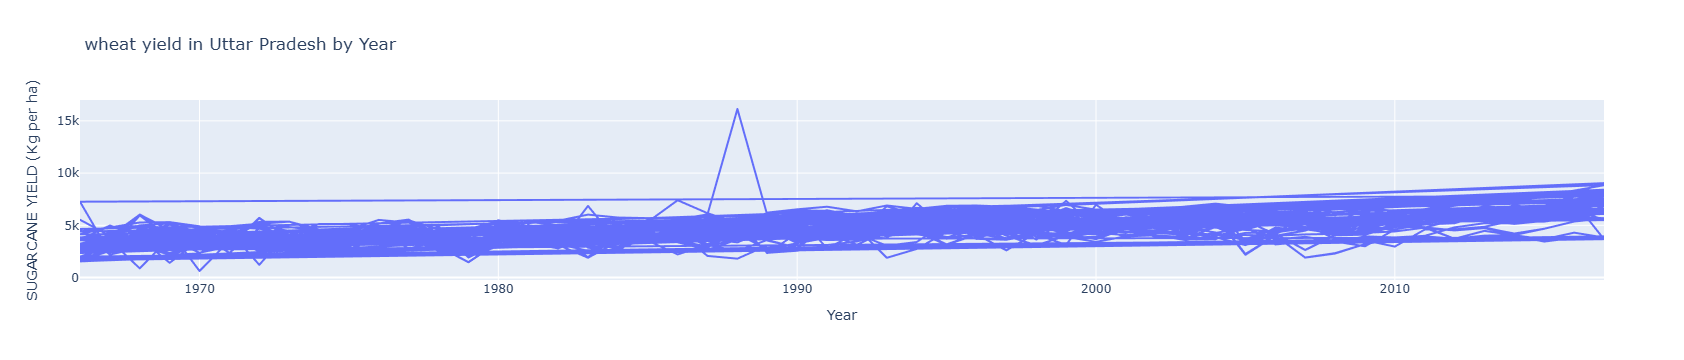

In [88]:
y = up['SUGARCANE YIELD (Kg per ha)']
fig = px.line(
    up,
    x='Year',
    y = y,
    title='wheat yield in Uttar Pradesh by Year',
    # color= 'Year',
    
    
)

fig.update_layout(
    showlegend = False
)

fig.show()


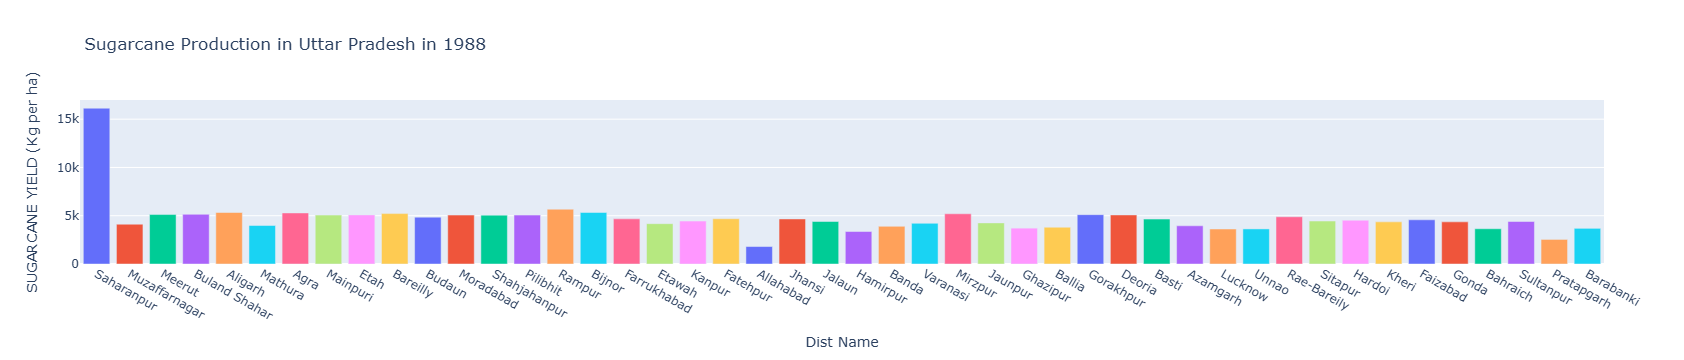

In [89]:
that_year = up[up['Year'] == 1988]
y = that_year['SUGARCANE YIELD (Kg per ha)']
fig = px.bar(
    that_year,
    x='Dist Name',
    y = y,
    title='Sugarcane Production in Uttar Pradesh in 1988',
    color= 'Dist Name',
      
)
fig.update_layout(
    showlegend = False
)

fig.show()

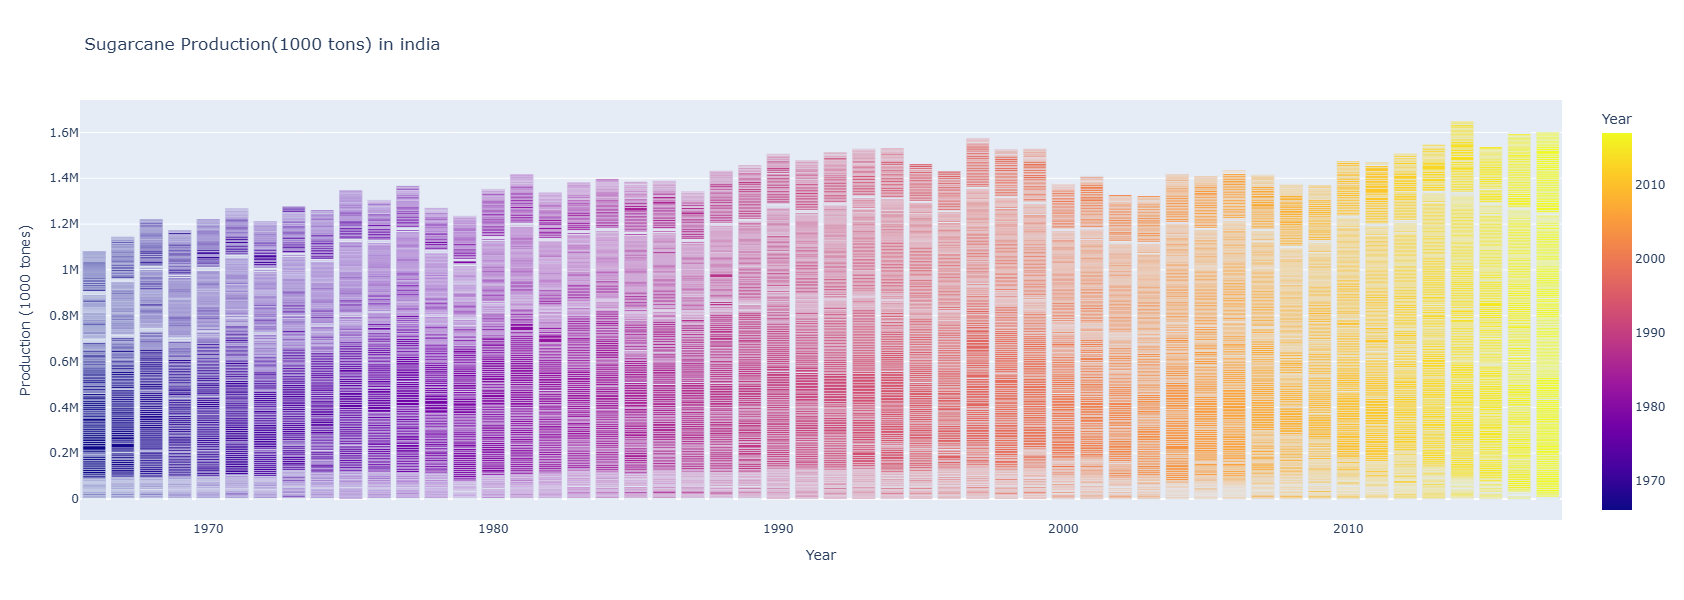

In [90]:

fig = px.bar(
    data,
    x='Year',
    y='SUGARCANE YIELD (Kg per ha)',
    title='Sugarcane Production(1000 tons) in india',
    color= 'Year'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Production (1000 tones)',
    height=600
)

fig.show()

## 🌾 Uttar Pradesh Crop Production Insights 

* **Rice & Wheat**

* The Basti district is a major contributor to both rice and wheat production, leading consistently in total output across multiple years.

* **Sugarcane**

* Meerut ranks as the highest sugarcane-producing district, followed by Kanpur.

* An exceptional spike in sugarcane production was observed in 1988, indicating a standout year historically.

* Saharanpur (misspelled earlier as “sharanpur”) contributes significantly with a remarkable yield of ~16,000 kg/ha, among the highest in the state.

* **Minor Pulses**

* The Jhansi district leads in minor pulses production, highlighting its specialization in pulse cultivation within the state.

### 📈 Production Trends (1966–2017)

* **Sugarcane**

* Shows an exceptional increase in total production over the years, especially after the 1980s, reflecting improved practices and possibly favorable climatic cycles.

* **Wheat & Rice**

* Both crops have shown a steady and gradual increase in production across the five decades — indicating consistent improvements in yield, area, and cultivation techniques.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#f0e9d5; font-family: Trebuchet MS; border-left: 5px solid #4CAF50;; padding: 13px;  color: #333; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">CROP ANALYSIS OF RAJASTHAN</div>

In [91]:
rajasthan = data[data['State Name'] == 'Rajasthan']

In [92]:
rajasthan_last_4_year = rajasthan[rajasthan['year_to_decade'] == '2014-2017']

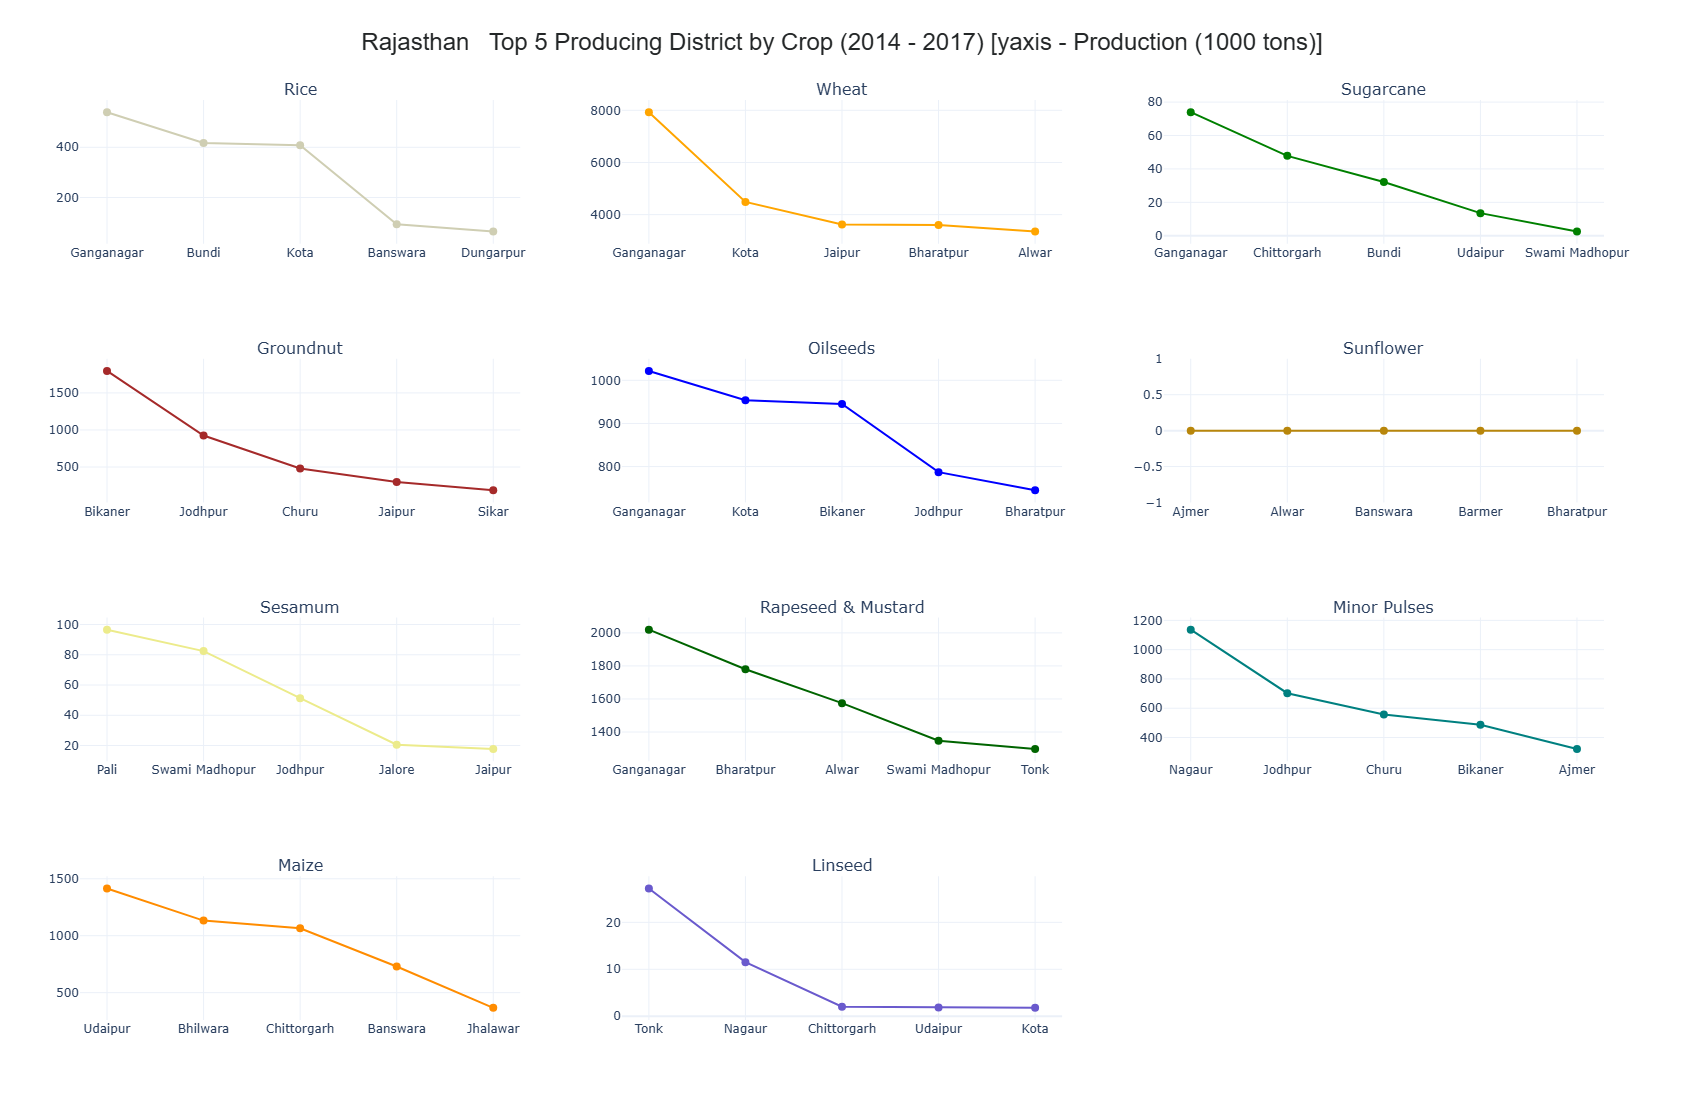

In [93]:
from plotly.subplots import make_subplots

crops = [
    ("Rice", 'RICE PRODUCTION (1000 tons)', "#cfceb3"),
    ("Wheat", 'WHEAT PRODUCTION (1000 tons)', 'orange'),
    ("Sugarcane", 'SUGARCANE PRODUCTION (1000 tons)', 'green'),
    ("Groundnut", 'GROUNDNUT PRODUCTION (1000 tons)', 'brown'),
    ("Oilseeds", 'OILSEEDS PRODUCTION (1000 tons)', 'blue'),
    ("Sunflower", 'SUNFLOWER PRODUCTION (1000 tons)', 'darkgoldenrod'),
    ("Sesamum", 'SESAMUM PRODUCTION (1000 tons)', "#eceb8b"),
    ("Rapeseed & Mustard", 'RAPESEED AND MUSTARD PRODUCTION (1000 tons)', 'darkgreen'),
    ("Minor Pulses", 'MINOR PULSES PRODUCTION (1000 tons)', 'teal'),
    ("Maize", 'MAIZE PRODUCTION (1000 tons)', 'darkorange'),
    ("Linseed", 'LINSEED PRODUCTION (1000 tons)', 'slateblue')
]

fig = make_subplots(rows=4, cols=3, subplot_titles=[crop[0] for crop in crops])


for i, (crop_name, column_name, color) in enumerate(crops):
    row = i // 3 + 1
    col = i % 3 + 1
    
    # Group and sort
    try:
        grouped = rajasthan_last_4_year.groupby('Dist Name', as_index=False)[column_name].sum()
        sorted_grouped = grouped.sort_values(by=column_name, ascending=False).head(5)

        fig.add_trace(go.Scatter(
            x=sorted_grouped['Dist Name'],
            y=sorted_grouped[column_name],
            mode='markers+lines',
            name=crop_name,
            line=dict(color=color),
            marker=dict(size=8)
        ), row=row, col=col)
        
    except KeyError:
        print(f"⚠️ Column '{column_name}' not found in the dataset. Skipping.")


fig.update_layout(
    title=dict(
        text='Rajasthan   Top 5 Producing District by Crop (2014 - 2017) [yaxis - Production (1000 tons)]',
        font=dict(
            family='Arial',
            size=24,
            color="#232627"
        ),
        x=0.5  
    ),
    showlegend=False,
    height=1100,
    width=1400,
    template='plotly_white'
)

fig.show()

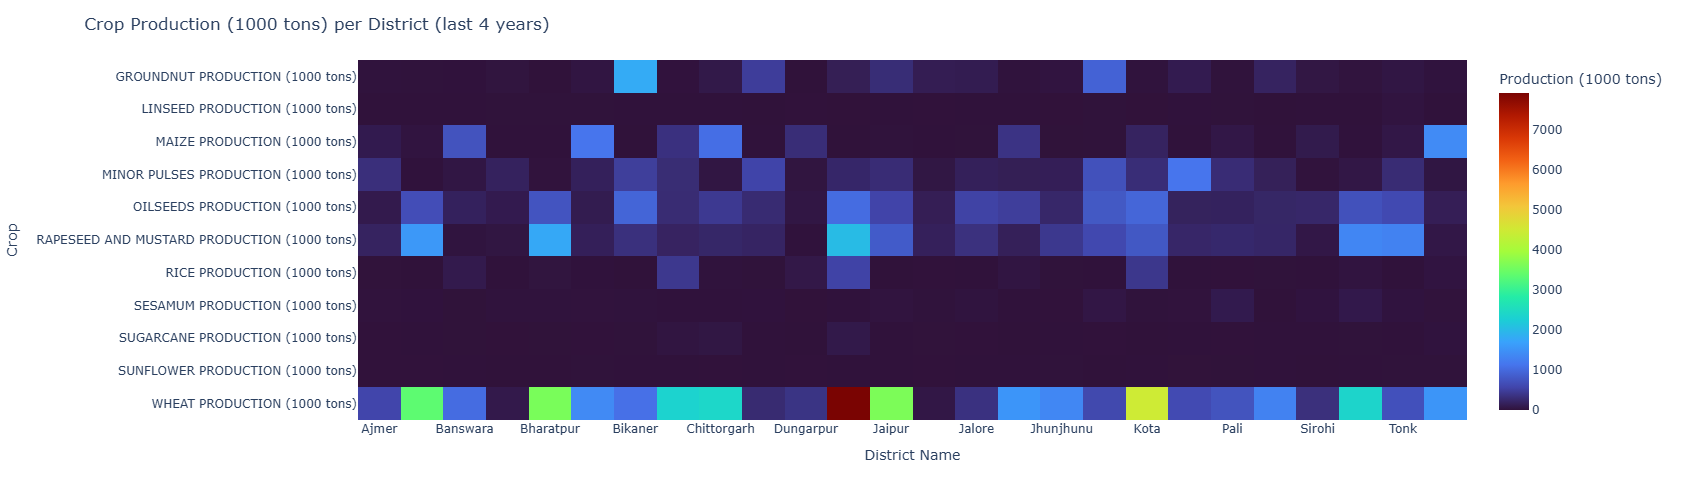

In [94]:
last_4_year = rajasthan[rajasthan['year_to_decade'] == '2014-2017']  ######### for last 5 year


production_cols = [col for col in last_4_year.columns if 'PRODUCTION' in col]
production_data = last_4_year[['Dist Name'] + production_cols]

grouped_data = production_data.groupby('Dist Name',observed=True, as_index=False).sum()

heatmap_data = grouped_data.melt(id_vars='Dist Name', 
                                 var_name='Crop', 
                                 value_name='Production (1000 tons)')

heatmap_matrix = heatmap_data.pivot(index='Crop', columns='Dist Name', values='Production (1000 tons)')

fig = px.imshow(
    heatmap_matrix,
    labels=dict(x="District Name", y="Crop", color="Production (1000 tons)"),
    color_continuous_scale='Turbo',
    aspect="auto"
)

fig.update_layout(
    title='Crop Production (1000 tons) per District (last 4 years)',
    height=500,
    xaxis_nticks=20
)

fig.show()

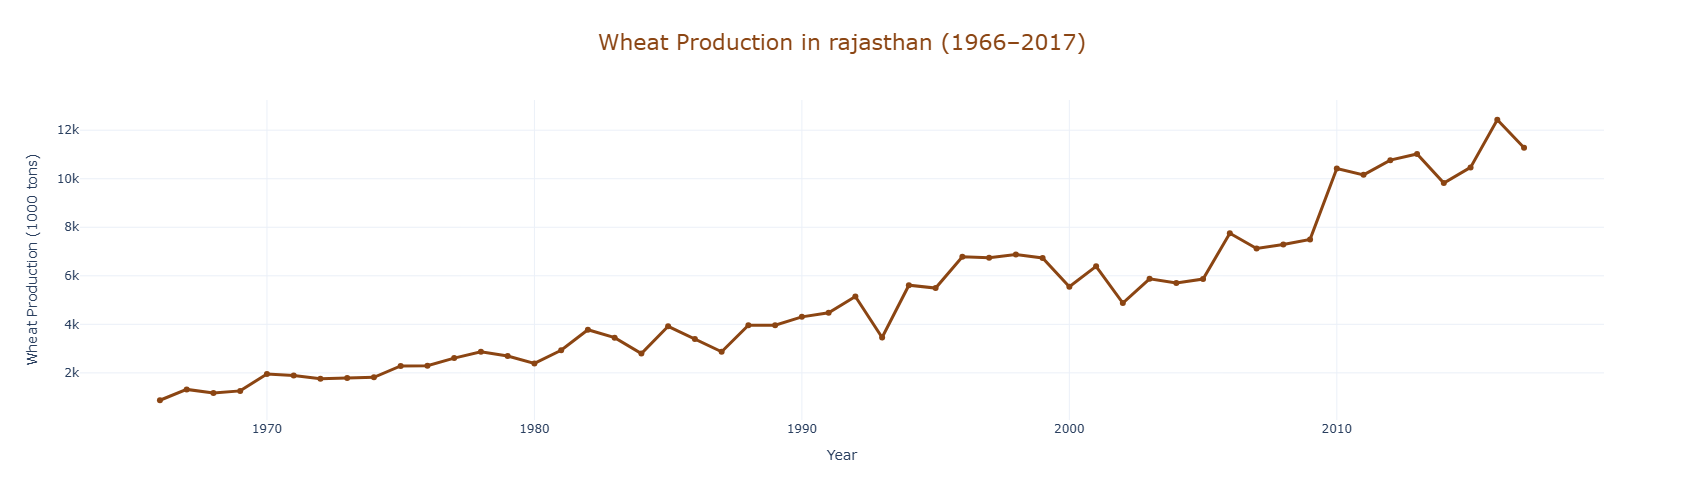

In [95]:
group = rajasthan.groupby('Year', as_index=False)['WHEAT PRODUCTION (1000 tons)'].sum()

fig = go.Figure()

fig.add_trace(go.Scatter(
    y=group['WHEAT PRODUCTION (1000 tons)'],
    x=group['Year'],
    mode='lines+markers',
    name='Wheat Production',
    line=dict(color='saddlebrown', width=3),
    marker=dict(size=6)
))

# Step 3: Update layout
fig.update_layout(
    title=dict(
        text='Wheat Production in rajasthan (1966–2017)',
        font=dict(size=22, color='saddlebrown'),
        x=0.5
    ),
    xaxis_title='Year',
    yaxis_title='Wheat Production (1000 tons)',
    template='plotly_white',
    height=500,
    width=900
)

fig.show()


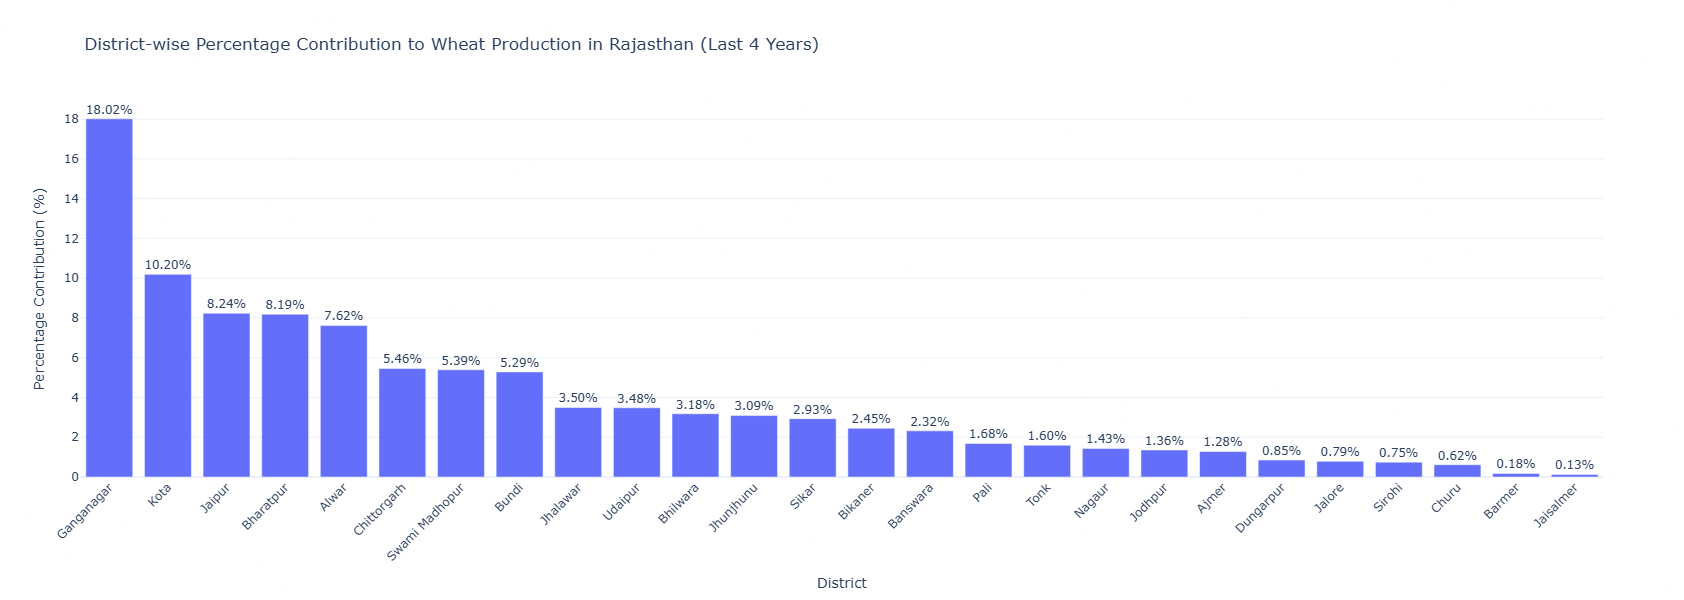

In [96]:
district_group = rajasthan_last_4_year.groupby('Dist Name', as_index=False)['WHEAT PRODUCTION (1000 tons)'].sum()

total_production = district_group['WHEAT PRODUCTION (1000 tons)'].sum()
district_group['Percentage Contribution'] = (district_group['WHEAT PRODUCTION (1000 tons)'] / total_production) * 100

district_group = district_group.sort_values(by='Percentage Contribution', ascending=False)

fig = px.bar(
    district_group,
    x='Dist Name',
    y='Percentage Contribution',
    text='Percentage Contribution',
    title='District-wise Percentage Contribution to Wheat Production in Rajasthan (Last 4 Years)',
    labels={'Percentage Contribution': 'Contribution (%)'},
    template='plotly_white'
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title='Percentage Contribution (%)',
    xaxis_title='District',
    height=600,
    width=1000,
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

fig.show()


## 🌻 Rajasthan Crop Production Insights
* **🌾 Major Crops**

* Rajasthan's agriculture is prominently focused on:

* Rapeseed & Mustard

* Oilseeds (combined)

* Wheat
### 📈 Production Trends

* **Wheat:**

* Rajasthan has seen an exceptional rise in wheat production over the years — especially prominent in Ganganagar.

* This growth indicates increased yield, expanded cultivation area, or improved agronomic practices.

* **Rapeseed & Mustard:**

* Rajasthan is the leading producer of rapeseed and mustard in India.

* The state contributes a major share of the country's total mustard seed output, driven by both area and yield advantages.

* **Oilseeds (overall):**

* Rajasthan outperforms most other states in combined oilseeds production, including mustard, sesame, linseed, and sunflower.

* This makes it a key region in India’s edible oil ecosystem.